# CS780: Deep Reinforcement Learning Assignment - 1
***Instructor: Ashutosh Modi***


- Submission Deadline: 07/02/2026; 11:59 PM
- Submission Form: [https://forms.gle/KZ8EZwUuddw1Gh648](https://forms.gle/KZ8EZwUuddw1Gh648)


## Problem 1: Multi-armed Bandits
$(10+10+60+20+20+20+20+20+20+20=220\text{ points})$

In lecture 6 we learnt about Multi-armed bandit. In this problem, you will be implementing Multi-armed bandit with different strategies. The aim is to compare the performance of different strategies.
In particular, you will be implementing 2-armed Bernoulli Bandit (Figure (a)) and 10-armed Gaussian Bandit (Figure (b)).

![multi-armed bandits](https://i.postimg.cc/d0LBhpRH/Screenshot-2026-01-18-at-2-55-07-PM.png)


**2-armed Bernoulli Bandit:** The mathematical formulation is as follows:

$$
R_0 \sim \text{Bernoulli}(\alpha)
$$
$$
R_1 \sim \text{Bernoulli}(\beta)
$$

**10-armed Gaussian Bandit:** The mathematical formulation is as follows:

$$
q_*(k) \sim N(\mu=0, \sigma^2=1)
$$
$$
R_k \sim N(\mu=q_*(k), \sigma^2=1)
$$

Note that in 10-armed Gaussian Bandit, for each arm $k$, the action value $q_*(k)$ is sampled from a standard Gaussian distribution and reward for the corresponding arm is sample from a gaussian distribution which has mean $q_*(k)$ and unit standard deviation.



In [ ]:
# Install gymnasium
!pip install gymnasium

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import spaces

# For reproducibility
np.random.seed(40)

### 1. Create 2-armed bandit environment (10 points)
In Gymnasium create the environment for 2-armed Bernoulli Bandit. The environment should take $\alpha$ and $\beta$ as input parameters and simulate 2-armed bandit accordingly. Once you have implemented the environment, run it using different values of $\alpha$ and $\beta$ to make sure it is executing as expected. For, example, you can try with $(\alpha, \beta) = (0, 0), (1, 0), (0, 1), (1, 1), (0.5, 0.5)$, etc. Report about your test cases and how they point towards the correct implementation. Also report about your general observations.

In [ ]:
class TwoArmedBernoulliBandit(gym.Env):
    """
    Gymnasium environment for a 2-armed Bernoulli Bandit.
    Action 0 - Bernoulli(alpha)
    Action 1 - Bernoulli(beta)
    """

    def __init__(self, alpha, beta):
        """
        Initialize the environment.

        Args:
            alpha (float): Success probability for Arm 0.
            beta (float): Success probability for Arm 1.
        """
        super().__init__()
        assert 0.0 <= alpha <= 1.0
        assert 0.0 <= beta <=1.0
        self.alpha=alpha
        self.beta=beta
        self.action_space=spaces.Discrete(2)
        self.observation_space=spaces.Discrete(1)
        pass


    def reset(self, seed=None, options=None):
        """
        Reset the environment.
        """
        super().reset(seed=seed)
        return 0, {}

    def step(self, action):
        """
        Execute one time step within the environment.

        Args:
            action (int): The selected arm (0 or 1).

        Returns: tuple of (observation, reward, terminated, truncated, info)
            observation (int): 0 (dummy state).
            reward (float): 1.0 (success) or 0.0 (failure).
            terminated (bool): False (episodic tasks usually end, but bandits are often treated as infinite or fixed step).
            truncated (bool): False.
            info (dict): Empty dictionary.
        """
        assert self.action_space.contains(action)
        if action==0:
          reward=np.random.binomial(1,self.alpha)
        else:
          reward=np.random.binomial(1,self.beta)
        observation=0
        terminated=False
        truncated=False
        info={}
        return observation,reward,terminated,truncated,info
        pass

In [ ]:
def test_bernoulli_bandit(alpha, beta):
    """
    Test the 2-armed Bernoulli Bandit environment to verify probabilities.

    Args:
        alpha (float): Success probability for Arm 0.
        beta (float): Success probability for Arm 1.
    """
    steps = 10_000
    env = TwoArmedBernoulliBandit(alpha,beta)
    env.reset()
    reward_arm0=[]
    reward_arm1=[]
    for _ in range(steps):
      _,r,_,_,_ =env.step(0)
      reward_arm0.append(r)

    for _ in range(steps):
      _,r,_,_,_ =env.step(1)
      reward_arm1.append(r)


    print(f"(alpha, beta) = ({alpha}, {beta})")
    print(f"  Arm 0 mean reward = {np.mean(reward_arm0):.2f}")
    print(f"  Arm 1 mean reward = {np.mean(reward_arm1):.2f}")
    print("-" * 40)


In [ ]:
'''
try for different values of alpha and beta!
test_cases = [
    (0, 0),
    (1, 0),
    (0, 1),
    (1, 1),
    (0.5, 0.5),
    (0.25, 0.75),
    (0.75, 0.25),
    (0.1, 0.9),
    (0.9, 0.1),
]

for alpha, beta in test_cases:
    test_bernoulli_bandit(alpha, beta)

'''
test_cases = [
    (0, 0),
    (1, 0),
    (0, 1),
    (1, 1),
    (0.5, 0.5),
    (0.25, 0.75),
    (0.75, 0.25),
    (0.1, 0.9),
    (0.9, 0.1),
]

for alpha,beta in test_cases:
  test_bernoulli_bandit(alpha,beta)

(alpha, beta) = (0, 0)
  Arm 0 mean reward = 0.00
  Arm 1 mean reward = 0.00
----------------------------------------
(alpha, beta) = (1, 0)
  Arm 0 mean reward = 1.00
  Arm 1 mean reward = 0.00
----------------------------------------
(alpha, beta) = (0, 1)
  Arm 0 mean reward = 0.00
  Arm 1 mean reward = 1.00
----------------------------------------
(alpha, beta) = (1, 1)
  Arm 0 mean reward = 1.00
  Arm 1 mean reward = 1.00
----------------------------------------
(alpha, beta) = (0.5, 0.5)
  Arm 0 mean reward = 0.49
  Arm 1 mean reward = 0.51
----------------------------------------
(alpha, beta) = (0.25, 0.75)
  Arm 0 mean reward = 0.25
  Arm 1 mean reward = 0.75
----------------------------------------
(alpha, beta) = (0.75, 0.25)
  Arm 0 mean reward = 0.75
  Arm 1 mean reward = 0.25
----------------------------------------
(alpha, beta) = (0.1, 0.9)
  Arm 0 mean reward = 0.10
  Arm 1 mean reward = 0.90
----------------------------------------
(alpha, beta) = (0.9, 0.1)
  Arm 0 m

**Observations:**

The above correctly depicts the 2-armed bernouili bandit enviorment in all the test cases due to following reason:

1) In determininstic cases like (0,0),(1,0),(0,1),(1,1) the reward matches the bernouili probabilities.

2) In other cases the reward approximately matches the true reward and as the no of steps increases it tends to match it truely

### 2. Create 10-armed bandit environment (10 points)
Similarly, in Gymnasium create the environment for 10-armed Gaussian Bandit. Make sure it is executing as expected by creating certain test cases, e.g., by playing with $\sigma$. Report about your test cases and how they point towards the correct implementation. Also report about your general observations.



In [ ]:
class TenArmedGaussianBandit(gym.Env):
    """
    Gymnasium environment for the 10-armed Gaussian Bandit.

    Mathematical Formulation:
        q*(k) ~ N(0, 1)
        R_t ~ N(q*(A_t), sigma^2)
    """

    def __init__(self, num_arms=10, sigma=1.0):
        """
        Initialize the environment.

        Args:
            num_arms (int): Number of arms (default = 10)
            sigma (float): Standard deviation of reward noise
        """
        super().__init__()
        self.num_arms=num_arms
        self.sigma=sigma
        self.action_space=spaces.Discrete(num_arms)
        self.observation_space=spaces.Discrete(1)
        self.q_star=None


    def reset(self, seed=None, options=None):
        """
        Reset the environment.

        Returns:
            observation (int): Dummy observation
            info (dict)
        """
        self.q_star=np.random.normal(0.0,1.0,size=self.num_arms)
        observation=0
        info={"q_star":self.q_star.copy()}
        return observation,info


    def step(self, action):
        """
        Execute one step of the environment.

        Args:
            action (int): Selected arm (0 to num_arms - 1)

        Returns: tuple of (observation, reward, terminated, truncated, info)
            observation (int): 0 (dummy state).
            reward (float): Sampled Gaussian reward
            terminated (bool): False (episodic tasks usually end, but bandits are often treated as infinite or fixed step).
            truncated (bool): False.
            info (dict): Empty dictionary.
        """
        assert self.action_space.contains(action)
        reward=np.random.normal(loc=self.q_star[action],scale=self.sigma)
        observation=0
        terminated=False
        truncated=False
        info={}
        return observation,reward,terminated,truncated,info
        pass


In [ ]:
def test_gaussian_bandit(sigma, arm=0):
    """
    Pull a single arm repeatedly to verify Gaussian reward statistics.

    Verify two things:
      1. Does the sample mean converge to q*(k)?
      2. Does the sample standard deviation match sigma?

    Args:
        sigma (float): Standard deviation of Gaussian reward noise
        arm (int): Arm index to test (0 to 9)
    """
    steps = 10_000
    env=TenArmedGaussianBandit(sigma=sigma)
    _,info=env.reset()
    true_q=info["q_star"][arm]
    rewards=[]
    for _ in range(steps):
      _,r,_,_,_=env.step(arm)
      rewards.append(r)

    print(f"True q*(arm {arm}):{true_q:.4f}")
    print(f"Sample mean reward:{np.mean(rewards):.4f}")
    print("-" * 45)


In [ ]:
'''
# Test with different noise levels
sigmas = [0.1, 0.5, 1.0, 2.0, 5.0]

for sigma in sigmas:
    test_gaussian_bandit(sigma=sigma)
'''
sigmas = [0.1, 0.5, 1.0, 2.0, 5.0]

for sigma in sigmas:
    test_gaussian_bandit(sigma=sigma)

True q*(arm 0):0.9593
Sample mean reward:0.9580
---------------------------------------------
True q*(arm 0):0.4514
Sample mean reward:0.4512
---------------------------------------------
True q*(arm 0):1.7143
Sample mean reward:1.7094
---------------------------------------------
True q*(arm 0):0.9463
Sample mean reward:0.9621
---------------------------------------------
True q*(arm 0):0.1994
Sample mean reward:0.2488
---------------------------------------------


**Observations:**

The above results verify the that the 10-armed Gaussian bandit environment behaves as intended and follows the formulation of stationary stochastic bandit:
 1) for a fixed arm the empirical reward after a large number of steps matches the true value of Q*(k)
 2) The true action value Q*(k) changes across different runs indicating the Q*(k) ~N(0,1)
 3) small differencs between the true action value and sample mean are observed which are expected due to stochastic nature.

### 3. Agents ($10 \times 6 = 60$ points)

#### 3. (a) Greedy agent (10 points)

Create a function that implements the **Pure Exploitation (Greedy) strategy** (the function should have same signature as shown in the lecture). Run this for 2-armed Bernoulli Bandit to generate a table of actions and rewards (as in the lecture) and manually verify that the strategy is working as expected.


In [ ]:
def pure_exploitation(env, max_steps):
    """
    Implement the Pure Exploitation (Greedy) strategy for a bandit problem.

    Args:
        env (gym.Env): Bandit environment with discrete action space.
        max_steps (int): Number of interaction steps.

    Returns:
        actions (np.ndarray): Actions selected at each step.
        rewards (np.ndarray): Rewards received at each step.
    """
    n_arms=env.action_space.n
    counts=np.zeros(n_arms)
    values=np.zeros(n_arms)
    actions=np.zeros(max_steps, dtype=int)
    rewards=np.zeros(max_steps)
    for t in range(max_steps):
        action=np.argmax(values)
        _,reward,_,_,_=env.step(action)
        counts[action]+=1
        values[action]+=(reward-values[action])/counts[action]
        actions[t]=action
        rewards[t]=reward
    return actions,rewards
    pass


In [ ]:
def print_interaction_table(actions, rewards, rows=15):
    """
    Prints a table of actions and rewards
    """
    print("Step | Action | Reward")
    print("----------------------")
    for i in range(min(rows, len(actions))):
        print(f"{i:>4} | {actions[i]:>6} | {rewards[i]:>6}")

In [ ]:
'''
Run it for 2-armed Bernoulli Bandit to generate a table of actions and rewards (use print_interaction_table) and
manually verify that the strategy is working as expected.
'''

alpha, beta = 0.8,0.2
env = TwoArmedBernoulliBandit(alpha,beta)

np.random.seed(12345)
env.reset(seed=12345)

actions, rewards =pure_exploitation(env,max_steps=50)
print_interaction_table(actions,rewards)

Step | Action | Reward
----------------------
   0 |      0 |    0.0
   1 |      0 |    1.0
   2 |      0 |    1.0
   3 |      0 |    1.0
   4 |      0 |    1.0
   5 |      0 |    1.0
   6 |      0 |    0.0
   7 |      0 |    1.0
   8 |      0 |    1.0
   9 |      0 |    1.0
  10 |      0 |    1.0
  11 |      0 |    0.0
  12 |      0 |    1.0
  13 |      0 |    1.0
  14 |      0 |    1.0


**Observations:**

1) Greedy strategy selects the arm with the highest estimated mean reward based on past observations.
2) From the table it can be understood that after the initial step same arm is selected again so it indicates that the algorithm does not explore any other arm once an arm appears to be better so it define the pure exploitation strategy

#### 3. (b) Exploration Agent (10 points)


Create a function that implements the **Pure Exploration strategy** (the function should have same signature as shown in the lecture). Run this for 2-armed Bernoulli Bandit to generate a table of actions and rewards (as in the lecture) and manually verify that the strategy is working as expected.



In [ ]:
def pure_exploration(env, max_steps):
    """
    Implements the Pure Exploration strategy for a bandit problem.

    Args:
        env (gym.Env): Bandit environment with discrete action space.
        max_steps (int): Number of interaction steps.

    Returns:
        actions (np.ndarray): Actions selected at each step.
        rewards (np.ndarray): Rewards received at each step.
    """
    n_arms=env.action_space.n
    actions=np.zeros(max_steps,dtype=int)
    rewards=np.zeros(max_steps)

    for t in range(max_steps):
        action=np.random.choice(n_arms)
        _,reward,_,_,_=env.step(action)
        actions[t]=action
        rewards[t]=reward
    return actions,rewards
    pass


In [ ]:
'''
Run it for 2-armed Bernoulli Bandit to generate a table of actions and rewards (use print_interaction_table)  and
manually verify that the strategy is working as expected.
'''

alpha, beta =0.8,0.2
env = TwoArmedBernoulliBandit(alpha,beta)
np.random.seed(12345)
env.reset(seed=12345)
actions, rewards = pure_exploration(env,max_steps=50)
print_interaction_table(actions,rewards)

Step | Action | Reward
----------------------
   0 |      0 |    0.0
   1 |      1 |    0.0
   2 |      0 |    0.0
   3 |      0 |    1.0
   4 |      0 |    1.0
   5 |      0 |    1.0
   6 |      1 |    0.0
   7 |      0 |    0.0
   8 |      1 |    0.0
   9 |      0 |    1.0
  10 |      1 |    0.0
  11 |      1 |    1.0
  12 |      1 |    1.0
  13 |      1 |    0.0
  14 |      0 |    0.0


**Observations:**
1) In the pure exploration strategy actions are selected uniformly at random without using any information from past rewards.
2) we can see from the interaction table,it is observed that both arms are selected multiple times and also there is not any pattern it seems very randomly so we can say that the reward received do not influence the future selection as the strategy continues to explore.

#### 3. (c) $\epsilon $-greedy agent (10 points)

Create a function that implements the **epsilon-Greedy strategy** (the function should have same signature as shown in the lecture). Run this for 2-armed Bernoulli Bandit with different values of epsilon, ranging from small to large values. Verify that your implementation is working.


In [ ]:
def epsilon_greedy(env, max_steps, epsilon):
    """
    Implement the Epsilon-Greedy strategy for a bandit problem.

    Args:
        env (gym.Env): Bandit environment with discrete action space.
        max_steps (int): Number of interaction steps.
        epsilon (float): Probability of choosing a random action (exploration).

    Returns:
        actions (np.ndarray): Actions selected at each step.
        rewards (np.ndarray): Rewards received at each step.
    """
    n_arms=env.action_space.n
    counts=np.zeros(n_arms)
    values=np.zeros(n_arms)
    actions=np.zeros(max_steps, dtype=int)
    rewards=np.zeros(max_steps)
    for t in range(max_steps):
        if np.random.rand()<epsilon:
            action=np.random.choice(n_arms)
        else:
            action=np.argmax(values)
        _,reward,_,_,_=env.step(action)
        counts[action]+=1
        values[action]+=(reward-values[action])/counts[action]
        actions[t]=action
        rewards[t]=reward

    return actions,rewards
    pass


In [ ]:
'''
Run it for 2-armed Bernoulli Bandit to generate a table of actions and rewards (use print_interaction_table)  and
manually verify that the strategy is working as expected.

use diff values of epsilons!
epsilons = [0.01, 0.1, 0.5, 1.0]
'''

alpha, beta =0.8,0.2
env = TwoArmedBernoulliBandit(alpha,beta)
epsilons = [0.01, 0.1, 0.5, 1.0]
for eps in epsilons:
  print(f"\nEpsilon = {eps}")
  print("----------------------")
  np.random.seed(12345)
  env.reset(seed=12345)
  actions,rewards=epsilon_greedy(env,max_steps=50,epsilon=eps)
  print_interaction_table(actions,rewards)



Epsilon = 0.01
----------------------
Step | Action | Reward
----------------------
   0 |      0 |    1.0
   1 |      0 |    1.0
   2 |      0 |    1.0
   3 |      0 |    1.0
   4 |      0 |    1.0
   5 |      0 |    0.0
   6 |      1 |    0.0
   7 |      0 |    1.0
   8 |      0 |    1.0
   9 |      0 |    1.0
  10 |      0 |    0.0
  11 |      0 |    1.0
  12 |      0 |    0.0
  13 |      0 |    1.0
  14 |      0 |    1.0

Epsilon = 0.1
----------------------
Step | Action | Reward
----------------------
   0 |      0 |    1.0
   1 |      0 |    1.0
   2 |      0 |    1.0
   3 |      0 |    1.0
   4 |      0 |    1.0
   5 |      0 |    0.0
   6 |      1 |    0.0
   7 |      0 |    1.0
   8 |      0 |    1.0
   9 |      0 |    1.0
  10 |      0 |    0.0
  11 |      0 |    1.0
  12 |      0 |    0.0
  13 |      0 |    1.0
  14 |      0 |    1.0

Epsilon = 0.5
----------------------
Step | Action | Reward
----------------------
   0 |      0 |    1.0
   1 |      0 |    0.0
   2 |     

**Observations:**

1) epsilon greedy is a way to to manage exploration vs exploitation
2) for epsilon =1 action selection is completely random so it matches the idea of pure exploration and as epsilon decrease (from 1->0.5->0.1->0.01) the frequency of exploration decrease and then it favours with the one with higher estimates reward.

#### 3. (d) Decaying $\epsilon $-greedy agent (10 points)


Create a function that implements the **decaying epsilon-Greedy strategy** (the function should have same signature as shown in the lecture). You can try two different versions of decay: linear and exponential. Start with the value of 1.0 for epsilon and decay it linearly/exponentially with pre-defined rate to 0.0. You can try with different rates of decays. The type of decay and the final decay rate are input parameters to the function, include these in the function definition.

    

In [ ]:
def decaying_epsilon_greedy(env, max_steps,
                            epsilon_start,
                            epsilon_end,
                            decay_type):
    """
    Implements a decaying Epsilon-Greedy strategy.

    Args:
        env (gym.Env): Bandit environment with discrete action space.
        max_steps (int): Number of interaction steps.
        epsilon_start (float): Initial value of epsilon.
        epsilon_end (float): Final value of epsilon.
        decay_type (str): Type of decay ('linear' or 'exponential').

    Returns:
        actions (np.ndarray): Actions selected at each step.
        rewards (np.ndarray): Rewards received at each step.
    """
    n_arms=env.action_space.n
    counts=np.zeros(n_arms)
    values=np.zeros(n_arms)
    actions=np.zeros(max_steps, dtype=int)
    rewards=np.zeros(max_steps)
    for t in range(max_steps):
      if decay_type=="linear":
              epsilon=epsilon_start-(epsilon_start-epsilon_end)*(t/max_steps)
      elif decay_type=="exponential":
              epsilon=epsilon_start*((epsilon_end/epsilon_start)**(t/max_steps))
      else:
              raise ValueError("decay_type must be 'linear' or 'exponential'")
      if np.random.rand()<epsilon:
          action=np.random.choice(n_arms)
      else:
          action=np.argmax(values)
      _,reward,_,_,_=env.step(action)
      counts[action]+=1
      values[action]+=(reward-values[action])/counts[action]
      actions[t]=action
      rewards[t]=reward

    return actions,rewards
    pass


In [ ]:
'''
Run it for 2-armed Bernoulli Bandit to generate a table of actions and rewards (use print_interaction_table)  and
manually verify that the strategy is working as expected.

play with diff start and end values!
configs = [
    ("linear", 1.0, 0.0),
    ("exponential", 1.0, 0.01)
]

'''


alpha, beta =0.9,0.1
env = TwoArmedBernoulliBandit(alpha,beta)

configs = [
   ("linear", 1.0, 0.0),
    ("exponential", 1.0, 0.01)
]
for decay_type,eps_start,eps_end in configs:
  print(f"\nDecay type: {decay_type}, epsilon_start={eps_start}, epsilon_end={eps_end}")
  print("-------------------------------------------------------------")
  np.random.seed(12345)
  env.reset(seed=12345)
  actions,rewards=decaying_epsilon_greedy(env,max_steps=30,epsilon_start=eps_start,epsilon_end=eps_end,decay_type=decay_type)
  print_interaction_table(actions,rewards,30)




Decay type: linear, epsilon_start=1.0, epsilon_end=0.0
-------------------------------------------------------------
Step | Action | Reward
----------------------
   0 |      1 |    0.0
   1 |      0 |    1.0
   2 |      0 |    1.0
   3 |      0 |    1.0
   4 |      0 |    0.0
   5 |      1 |    0.0
   6 |      0 |    1.0
   7 |      0 |    1.0
   8 |      0 |    1.0
   9 |      0 |    0.0
  10 |      1 |    0.0
  11 |      0 |    0.0
  12 |      0 |    1.0
  13 |      1 |    0.0
  14 |      0 |    1.0
  15 |      0 |    1.0
  16 |      0 |    0.0
  17 |      0 |    1.0
  18 |      0 |    1.0
  19 |      0 |    1.0
  20 |      1 |    0.0
  21 |      0 |    1.0
  22 |      0 |    0.0
  23 |      1 |    0.0
  24 |      0 |    1.0
  25 |      0 |    1.0
  26 |      0 |    1.0
  27 |      1 |    0.0
  28 |      0 |    1.0
  29 |      0 |    1.0

Decay type: exponential, epsilon_start=1.0, epsilon_end=0.01
-------------------------------------------------------------
Step | Action | Reward

**Observations:**

1) In both linear and exponential cases the initial step shows the exploratory behaviour due to high epsilon values resulting in random arm selection.
2) Due to the stochastic nature of bernouili the all the observation are zero consequently all the estimated action values remained equal throughout the experiment.
3) in linear epsilon agent explores for longer time bt for the exponential epsilon decay exploration decreases rapidly in early stages than linear

#### 3. (e) Softmax agent (10 points)


Create a function that implements the **Softmax strategy** (the function should have same signature as shown in the lecture). You would have to play with the initial temperature parameter. For example, you start with initial temperature of 100 and decay it linearly to 0.01 or you start with initial temperature of infty and decay it linearly to 0.005, etc.


In [ ]:
def softmax(env, max_steps,
                     temp_start,
                     temp_end,
                     decay_type):
    """
    Implements the Softmax (Boltzmann) exploration strategy.

    Args:
        env (gym.Env): Bandit environment with discrete action space.
        max_steps (int): Number of interaction steps.
        temp_start (float): Initial temperature (Tau).
        temp_end (float): Final temperature.
        decay_type (str): 'linear' or 'exponential'

    Returns:
        actions (np.ndarray): Actions selected at each step.
        rewards (np.ndarray): Rewards received at each step.
    """
    n_arms=env.action_space.n
    counts=np.zeros(n_arms)
    values=np.zeros(n_arms)
    actions=np.zeros(max_steps,dtype=int)
    rewards=np.zeros(max_steps)
    for t in range(max_steps):
      if decay_type=="linear":
        tau=temp_start-(temp_start-temp_end)*(t/max_steps)
      elif decay_type=="exponential":
        tau=temp_start*((temp_end/temp_start)**(t/max_steps))
      else:
        raise ValueError("decay_type must be 'linear' or 'exponential'")
      preferences=values/max(tau,1e-8)
      preferences-=np.max(preferences)
      probs=np.exp(preferences)
      probs/=np.sum(probs)
      action=np.random.choice(n_arms,p=probs)
      _,reward,_,_,_=env.step(action)
      counts[action]+=1
      values[action]+=(reward-values[action])/counts[action]
      actions[t]=action
      rewards[t]=reward
    return actions,rewards
    pass


In [ ]:
'''
Run it for 2-armed Bernoulli Bandit to generate a table of actions and rewards (use print_interaction_table)  and
manually verify that the strategy is working as expected.

play with diff start and end values!
configs = [
    ("linear", 100.0, 0.01),
    ("linear", 1e6, 0.005),
    ("exponential", 100.0, 0.01)
]

'''



alpha, beta =0.8,0.2
env = TwoArmedBernoulliBandit(alpha,beta)

configs = [
    ("linear", 100.0, 0.01),
    ("linear", 1e6, 0.005),
    ("exponential", 100.0, 0.01)
]
for decay_type, temp_start, temp_end in configs:
    print(f"\nDecay:{decay_type},temp_start={temp_start},temp_end={temp_end}")
    print("---------------------------------------------------")
    np.random.seed(1)
    env.reset(seed=1)
    actions,rewards=softmax(
        env,
        max_steps=100,
        temp_start=temp_start,
        temp_end=temp_end,
        decay_type=decay_type
    )
    print_interaction_table(actions,rewards,100)



Decay:linear,temp_start=100.0,temp_end=0.01
---------------------------------------------------
Step | Action | Reward
----------------------
   0 |      0 |    1.0
   1 |      0 |    1.0
   2 |      0 |    1.0
   3 |      0 |    1.0
   4 |      0 |    1.0
   5 |      0 |    1.0
   6 |      0 |    0.0
   7 |      0 |    1.0
   8 |      0 |    1.0
   9 |      0 |    1.0
  10 |      1 |    1.0
  11 |      0 |    1.0
  12 |      1 |    1.0
  13 |      0 |    1.0
  14 |      0 |    0.0
  15 |      0 |    1.0
  16 |      1 |    0.0
  17 |      1 |    0.0
  18 |      1 |    1.0
  19 |      0 |    1.0
  20 |      1 |    0.0
  21 |      0 |    1.0
  22 |      0 |    1.0
  23 |      1 |    0.0
  24 |      0 |    1.0
  25 |      0 |    1.0
  26 |      0 |    1.0
  27 |      0 |    1.0
  28 |      1 |    0.0
  29 |      1 |    0.0
  30 |      0 |    1.0
  31 |      1 |    0.0
  32 |      0 |    1.0
  33 |      1 |    0.0
  34 |      1 |    0.0
  35 |      1 |    0.0
  36 |      0 |    0.0
  37 |

**Observations:**

1) In the observed result both the decay types produce similar action-reward patterns because the inital temperature is sufficiently large and problem is 2 armed bandit but the exponential decay reduces the exploration faster whereas linear decay maintains exploration more evenly across steps.


#### 3. (f) UCB agent (10 points)



Create a function that implements the **UCB strategy** (the function should have same signature as shown in the lecture). You would have to play with the `c` parameter. For example, you can try `c=0.2`, `c=0.5`, etc.


In [ ]:
def ucb_strategy(env, max_steps, c):
    """
    Implement the Upper Confidence Bound (UCB) strategy.

    Args:
        env (gym.Env): Bandit environment with discrete action space.
        max_steps (int): Number of interaction steps.
        c (float): Exploration coefficient controlling optimism.

    Returns:
        actions (np.ndarray): Actions selected at each step.
        rewards (np.ndarray): Rewards received at each step.
    """
    n_arms=env.action_space.n
    counts=np.zeros(n_arms)
    values=np.zeros(n_arms)
    actions=np.zeros(max_steps,dtype=int)
    rewards=np.zeros(max_steps)
    for t in range(max_steps):
      if t<n_arms:
        action=t
      else:
        ucb_values=values+c*np.sqrt(np.log(t+1)/counts)
        action=np.argmax(ucb_values)
      _,reward,_,_,_=env.step(action)
      counts[action]+=1
      values[action]+=(reward-values[action])/counts[action]
      actions[t]=action
      rewards[t]=reward
    return actions,rewards
    pass


In [ ]:
'''
Run it for 2-armed Bernoulli Bandit to generate a table of actions and rewards (use print_interaction_table)  and
manually verify that the strategy is working as expected.

play with diff c values
c_values = [0.0, 0.2, 0.5, 1.0]

'''


alpha, beta =0.8,0.2
env = TwoArmedBernoulliBandit(alpha,beta)
c_values = [0.0, 0.2, 0.5, 1.0]
for c in c_values:
  print(f"\nUCB with c={c}")
  print("--------------------")
  np.random.seed(1)
  env.reset(seed=1)
  actions,rewards=ucb_strategy(env,max_steps=100,c=c)
  print_interaction_table(actions,rewards,100)


UCB with c=0.0
--------------------
Step | Action | Reward
----------------------
   0 |      0 |    1.0
   1 |      1 |    0.0
   2 |      0 |    1.0
   3 |      0 |    1.0
   4 |      0 |    1.0
   5 |      0 |    1.0
   6 |      0 |    1.0
   7 |      0 |    1.0
   8 |      0 |    1.0
   9 |      0 |    1.0
  10 |      0 |    1.0
  11 |      0 |    1.0
  12 |      0 |    1.0
  13 |      0 |    0.0
  14 |      0 |    1.0
  15 |      0 |    1.0
  16 |      0 |    1.0
  17 |      0 |    1.0
  18 |      0 |    1.0
  19 |      0 |    1.0
  20 |      0 |    0.0
  21 |      0 |    0.0
  22 |      0 |    1.0
  23 |      0 |    1.0
  24 |      0 |    0.0
  25 |      0 |    0.0
  26 |      0 |    1.0
  27 |      0 |    1.0
  28 |      0 |    1.0
  29 |      0 |    0.0
  30 |      0 |    1.0
  31 |      0 |    1.0
  32 |      0 |    0.0
  33 |      0 |    1.0
  34 |      0 |    1.0
  35 |      0 |    1.0
  36 |      0 |    1.0
  37 |      0 |    0.0
  38 |      0 |    1.0
  39 |      0 |    1

**Observations:**

1) The UCB stategy initially explores both the arms to obtain the reward estimates and then increasingly favours the arms with the highest estimated reward
2) when c=0 algorithm behaves like pure greedy and as the values of c increases the exploration is becoming significant so larger values of c result in more frequent exploration so paramter c is eventually controlling the exploration-exploitation tradeoff.

### 4. 2-armed bandit testbed (20 points)

Create 50 different 2-armed Bernoulli Bandit environments by sampling different values of $\alpha$ and $\beta$ from a standard uniform distribution ($U(0,1)$). Run each of the agents above (6 in total) for 1000 time-steps (this is one run) for each instance of the environment. At each time step record the received reward. For a given agent, at each time step, average out the rewards over 50 instances of the environment. Draw a plot (e.g., using Matplotlib) of average rewards received vs. time step. Do this for all agents and plot it in the same plot. Now you can compare different agents (i.e., different strategies). Since different agents have different hyper-parameters, play with different settings and you can generate multiple different plots so as to aid comparison. Analyze the plots, write about your key observations, e.g., what strategy works
better, what settings for a strategy works better, what your findings about the agents, etc.

In [ ]:
def run_experiment_bernoulli(agent_func, agent_params, num_envs=50, steps=1000):
    """
    Runs an agent  across multiple 2-armed Bernoulli bandit environments and
    returns the average reward per time step.

    Args:
        agent_func: Agent function from Question 3.
        agent_params: Dictionary of agent hyperparameters.
        num_envs: Number of environments.
        steps: Number of steps per environment.

    Returns:
        avg_rewards: Array of average rewards.

    NOTE: increase the num_envs to get the much smoother curve. maybe 500 or 1000
    """
    all_rewards = np.zeros((num_envs, steps))
    for env_id in range(num_envs):
        alpha = np.random.uniform(0, 1)
        beta = np.random.uniform(0, 1)
        env = TwoArmedBernoulliBandit(alpha, beta)
        env.reset(seed=env_id)
        actions, rewards = agent_func(env, steps, **agent_params)
        all_rewards[env_id] = rewards
    avg_rewards = np.mean(all_rewards, axis=0)
    return avg_rewards
    pass


In [ ]:
def plot_agent_comparison(results_dict):
    """
    Plots average reward vs time step for multiple agents. (in single graph)

    Args:
        results_dict: Dictionary mapping agent name -> avg reward array.
    """
    plt.figure(figsize=(10, 6))
    for agent_name, avg_rewards in results_dict.items():
        plt.plot(avg_rewards, label=agent_name)
    plt.xlabel("Time Step")
    plt.ylabel("Average Reward")
    plt.title("2-Armed Bernoulli Bandit: Agent Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()
    pass


Running Greedy...
Running Pure Exploration...
Running Epsilon-Greedy (0.1)...
Running Decaying Epsilon-Greedy...
Running Softmax...
Running UCB (c=0.5)...


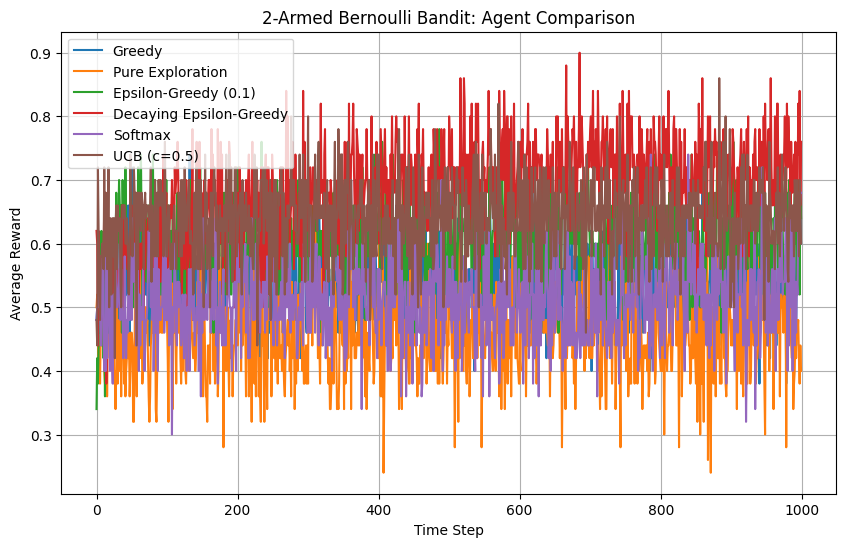

In [ ]:
# TODO: Define the agents and hyperparameters you want to compare
'''
agents_to_test = [
    {
        "name": "Greedy",
        "func": pure_exploitation,
        "params": {}
    },
    {
        "name": "Pure Exploration",
        "func": pure_exploration,
        "params": {}
    },
    {
        "name": "Epsilon-Greedy",
        "func": epsilon_greedy,
        "params": {"epsilon": 0.1}
    },
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": 1.0, "epsilon_end": 0.01, "decay_type": "exponential"}
    },
    {
        "name": "Softmax (Decaying)",
        "func": softmax_strategy,
        "params": {"temp_start": 100, "temp_end": 0.01, "decay_type": "linear"}
    },
    {
        "name": "UCB",
        "func": ucb_strategy,
        "params": {"c": 0.5}
    }
]
'''

# TODO: Loop through 'agents_to_test':
#   1. Call run_experiment_bernoulli for each agent.
#   2. Store the resulting curve in a dictionary (e.g., experiment_results_bernoulli).

# TODO: Call plot_agent_comparison(experiment_results_bernoulli).

'''
You must run the experiment multiple times with different configurations, diff agents_to_test, for example:

Different values of epsilon for epsilon-greedy (e.g., 0.01, 0.1, 0.5)

Different decay types (linear vs exponential)

Different UCB values (e.g., c = 0.2, 0.5, 1.0)

Different Softmax temperatures
'''

agents_to_test = [
    {
        "name": "Greedy",
        "func": pure_exploitation,
        "params": {}
    },
    {
        "name": "Pure Exploration",
        "func": pure_exploration,
        "params": {}
    },
    {
        "name": "Epsilon-Greedy (0.1)",
        "func": epsilon_greedy,
        "params": {"epsilon": 0.1}
    },
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": 1.0, "epsilon_end": 0.01, "decay_type": "exponential"}
    },
    {
        "name": "Softmax",
        "func": softmax,
        "params": {"temp_start": 100.0, "temp_end": 0.01, "decay_type": "linear"}
    },
    {
        "name": "UCB (c=0.5)",
        "func": ucb_strategy,
        "params": {"c": 0.5}
    }
]

experiment_results_bernoulli={}
for agent in agents_to_test:
    print(f"Running {agent['name']}...")
    avg_rewards = run_experiment_bernoulli(
        agent["func"],
        agent["params"],
        num_envs=50,
        steps=1000
    )
    experiment_results_bernoulli[agent["name"]] = avg_rewards
plot_agent_comparison(experiment_results_bernoulli)


**Observations:**

1) ordering from best->worst:

    i)UCB (c = 0.5)

    ii)Decaying ε-Greedy

    iii)Softmax

    iv)ε-Greedy (0.1)

    v)Greedy

    vi)Pure Exploration
2) above tell us that the adavptive exploration strategies such as decaying epsilon greedy and UCB are the most effective in stochastic bandit enviornment

### 5. 10-armed bandit testbed (20 points)
Repeat the same thing as above for 10-armed Gaussian Bandit.

In [ ]:
def run_experiment_gaussian(agent_func, agent_params,
                                       num_envs=50, steps=1000, sigma=1.0):
    """
    Runs an agent on multiple 10-armed Gaussian bandit environments and
    returns the average reward per time step.

    Args:
        agent_func: Agent function from Question 3.
        agent_params: Dictionary of agent hyperparameters.
        num_envs: Number of environments.
        steps: Number of steps per environment.
        sigma: Reward noise standard deviation.

    Returns:
        avg_rewards: Array of average rewards (length = steps).

    NOTE: increase the num_envs to get the much smoother curve. maybe 500 or 1000
    """

    all_rewards=np.zeros((num_envs,steps))
    for env_id in range(num_envs):
        env=TenArmedGaussianBandit(num_arms=10,sigma=sigma)
        env.reset(seed=env_id)
        actions, rewards=agent_func(env, steps,**agent_params)
        all_rewards[env_id]=rewards
    avg_rewards=np.mean(all_rewards, axis=0)
    return avg_rewards
    pass


In [ ]:
def plot_agent_comparison(results_dict):
    """
    same as Q4
    Plots average reward vs time step for multiple agents. (in single graph)

    Args:
        results_dict: Dictionary mapping agent name -> avg reward array.
    """
    plt.figure(figsize=(10, 6))
    for agent_name, avg_rewards in results_dict.items():
        plt.plot(avg_rewards, label=agent_name)
    plt.xlabel("Time Step")
    plt.ylabel("Average Reward")
    plt.title("10-Armed Gaussian Bandit: Agent Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()
    pass


Running Greedy...
Running Pure Exploration...
Running Epsilon-Greedy (0.1)...
Running Decaying Epsilon-Greedy...
Running Softmax...
Running UCB (c=0.5)...


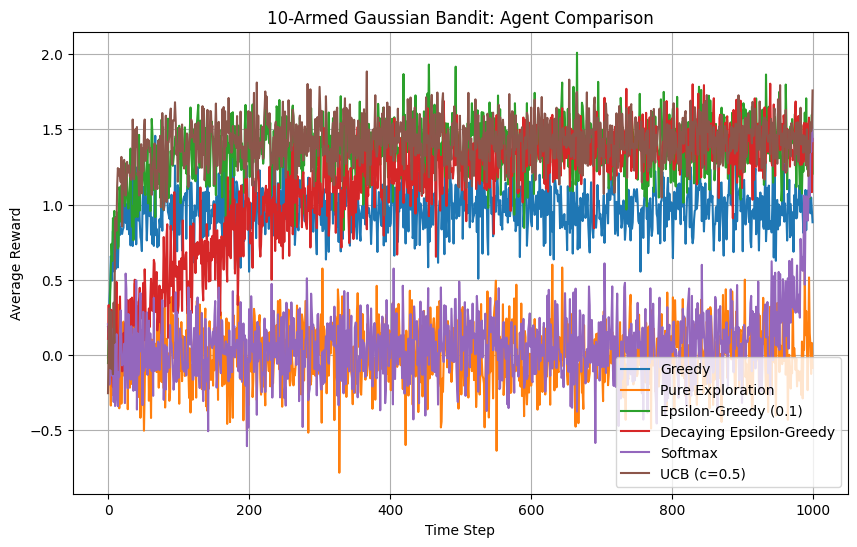

In [ ]:
# TODO: Define the agents and hyperparameters you want to compare
'''
agents_to_test = [
    {
        "name": "Greedy",
        "func": pure_exploitation,
        "params": {}
    },
    {
        "name": "Pure Exploration",
        "func": pure_exploration,
        "params": {}
    },
    {
        "name": "Epsilon-Greedy",
        "func": epsilon_greedy,
        "params": {"epsilon": _____}
    },
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": _____, "epsilon_end": _____, "decay_type": _____}
    },
    {
        "name": "Softmax (Decaying)",
        "func": softmax_strategy,
        "params": {"temp_start": _____, "temp_end": _____, "decay_type": _____}
    },
    {
        "name": "UCB",
        "func": ucb_strategy,
        "params": {"c": 0.5}
    }
]
'''

# TODO: Loop through 'agents_to_test':
#   1. Call run_experiment_gaussian for each agent.
#   2. Store the resulting curve in a dictionary (e.g., experiment_results_gaussian).

# TODO: Call plot_agent_comparison(experiment_results_gaussian).

'''
You must run the experiment multiple times with different configurations, diff agents_to_test, for example:

Different values of epsilon for epsilon-greedy (e.g., 0.01, 0.1, 0.5)

Different decay types (linear vs exponential)

Different UCB values (e.g., c = 0.2, 0.5, 1.0)

Different Softmax temperatures
'''
agents_to_test = [
    {
        "name": "Greedy",
        "func": pure_exploitation,
        "params": {}
    },
    {
        "name": "Pure Exploration",
        "func": pure_exploration,
        "params": {}
    },
    {
        "name": "Epsilon-Greedy (0.1)",
        "func": epsilon_greedy,
        "params": {"epsilon": 0.1}
    },
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": 1.0, "epsilon_end": 0.01, "decay_type": "exponential"}
    },
    {
        "name": "Softmax",
        "func": softmax,
        "params": {"temp_start": 100.0, "temp_end": 0.01, "decay_type": "linear"}
    },
    {
        "name": "UCB (c=0.5)",
        "func": ucb_strategy,
        "params": {"c": 0.5}
    }
]

experiment_results_gaussian = {}

for agent in agents_to_test:
    print(f"Running {agent['name']}...")
    avg_rewards = run_experiment_gaussian(
        agent["func"],
        agent["params"],
        num_envs=50,
        steps=1000,
        sigma=1.0
    )
    experiment_results_gaussian[agent["name"]] = avg_rewards
plot_agent_comparison(experiment_results_gaussian)


**Observations:**

1) the order of my plot means the best to worst of my algorithm:

    i) UCB

    ii)Decaying Greedy

    iii) epsilon greedy

    iv) greedy

    v) softmax

    vi) pure exploration

### 6. 2-armed Regret (20 points)
In the lecture we defined *Regret* as $\sum_{e=1}^{E} \mathbb{E}[v_* - q_*(A_e)]$, i.e. episode wise sum of the expected value of the difference between optimal action value ($v_*$) and true value ($q_*$) of taking an action $A_e$. For the 2-armed Bernoulli Bandit plot the regret vs episodes for each of the agent. Use the same setting of 50 environment instances as in the previous part. What do you observe? How do regrets evolve for different methods? Describe your observations in details.



In [ ]:
def run_regret_experiment_bernoulli(agent_func, agent_params,
                                    num_envs=50, steps=1000):
    """
    Runs a bandit agent on multiple 2-armed Bernoulli environments and
    computes the average cumulative regret.

    Args:
        agent_func: Agent function (from Question 3).
        agent_params: Dictionary of agent hyperparameters.
        num_envs: Number of environments to average over.
        steps: Number of episodes per environment.

    Returns:
        avg_cumulative_regret: Cumulative expected regret (length = steps).
    """
    all_regrets = np.zeros((num_envs, steps))
    for env_id in range(num_envs):
        alpha = np.random.uniform(0, 1)
        beta = np.random.uniform(0, 1)
        env = TwoArmedBernoulliBandit(alpha, beta)
        env.reset(seed=env_id)
        v_star = max(alpha, beta)
        actions, _ = agent_func(env, steps, **agent_params)
        cumulative_regret = 0.0
        for t in range(steps):
            if actions[t] == 0:
                q_star = alpha
            else:
                q_star = beta
            cumulative_regret += (v_star - q_star)
            all_regrets[env_id, t] = cumulative_regret
    avg_cumulative_regret = np.mean(all_regrets, axis=0)
    return avg_cumulative_regret
    pass



In [ ]:
def plot_regret_comparison(results_dict):
    """
    Plots cumulative regret vs episodes for multiple agents.

    Args:
        results_dict: Mapping agent name -> cumulative regret array.
    """
    plt.figure(figsize=(10, 6))
    for agent_name, regret in results_dict.items():
        plt.plot(regret, label=agent_name)
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Regret")
    plt.title("2-Armed Bernoulli Bandit: Regret Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()
    pass

Running regret for Greedy...
Running regret for Pure Exploration...
Running regret for Epsilon-Greedy (0.1)...
Running regret for Decaying Epsilon-Greedy...
Running regret for Softmax...
Running regret for UCB (c=0.5)...


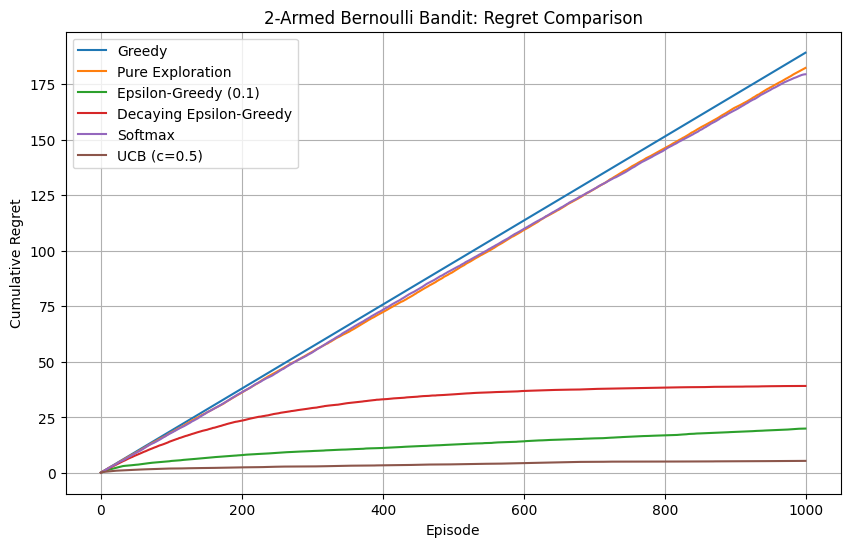

In [ ]:
'''
Use the same setting of 50 environment
instances as in the previous part. What do you observe? How do regrets evolve for different methods?
Describe your observations in details.
'''
agents_to_test = [
    {
        "name": "Greedy",
        "func": pure_exploitation,
        "params": {}
    },
    {
        "name": "Pure Exploration",
        "func": pure_exploration,
        "params": {}
    },
    {
        "name": "Epsilon-Greedy (0.1)",
        "func": epsilon_greedy,
        "params": {"epsilon": 0.1}
    },
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": 1.0, "epsilon_end": 0.01, "decay_type": "exponential"}
    },
    {
        "name": "Softmax",
        "func": softmax,
        "params": {"temp_start": 100.0, "temp_end": 0.01, "decay_type": "linear"}
    },
    {
        "name": "UCB (c=0.5)",
        "func": ucb_strategy,
        "params": {"c": 0.5}
    }
]

regret_results = {}
for agent in agents_to_test:
    print(f"Running regret for {agent['name']}...")
    regret_results[agent["name"]] = run_regret_experiment_bernoulli(
        agent["func"],
        agent["params"],
        num_envs=50,
        steps=1000
    )
plot_regret_comparison(regret_results)


**Observations:**

1) Pure exploration and Softmax show nearly linear regret growth, as continued random or excessive exploration leads to frequent suboptimal action selection.

2) Greedy and ε-greedy reduce regret compared to random strategies, but greedy suffers from early commitment to suboptimal arms while fixed ε causes steady regret accumulation.

3) Decaying ε-greedy and UCB achieve the lowest cumulative regret, with UCB performing best overall by efficiently balancing exploration and exploitation.

### 7. 10-armed Regret (20 points)

Repeat the same thing as above for 10-armed Gaussian Bandit.



In [ ]:
def run_regret_experiment_gaussian(agent_func, agent_params,
                                   num_envs=50, steps=1000):
    """
    Runs a bandit agent on multiple 10-armed Gaussian environments and
    computes the average cumulative regret.

    Args:
        agent_func: Agent function.
        agent_params: Dictionary of agent hyperparameters.
        num_envs: Number of environments to average over.
        steps: Number of episodes per environment.

    Returns:
        avg_cumulative_regret: Cumulative expected regret (length = steps).
    """
    all_regrets=np.zeros((num_envs,steps))
    for env_id in range(num_envs):
        env=TenArmedGaussianBandit(num_arms=10,sigma=1.0)
        obs,info=env.reset(seed=env_id)
        q_star=info["q_star"]
        v_star=np.max(q_star)
        actions,_=agent_func(env,steps,**agent_params)
        cumulative_regret = 0.0
        for t in range(steps):
            chosen_arm=actions[t]
            cumulative_regret+=(v_star-q_star[chosen_arm])
            all_regrets[env_id,t]=cumulative_regret
    avg_cumulative_regret=np.mean(all_regrets,axis=0)
    return avg_cumulative_regret
    pass

In [ ]:
def plot_regret_comparison(results_dict):
    """
    same as q6
    Plots cumulative regret vs episodes for multiple agents.

    Args:
        results_dict: Mapping agent name -> cumulative regret array.
    """
    plt.figure(figsize=(10,6))
    for agent_name,regret in results_dict.items():
        plt.plot(regret,label=agent_name)
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Regret")
    plt.title("10-Armed Gaussian Bandit: Regret Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()
    pass

Running regret for Greedy...
Running regret for Pure Exploration...
Running regret for Epsilon-Greedy (0.1)...
Running regret for Decaying Epsilon-Greedy...
Running regret for Softmax...
Running regret for UCB (c=0.5)...


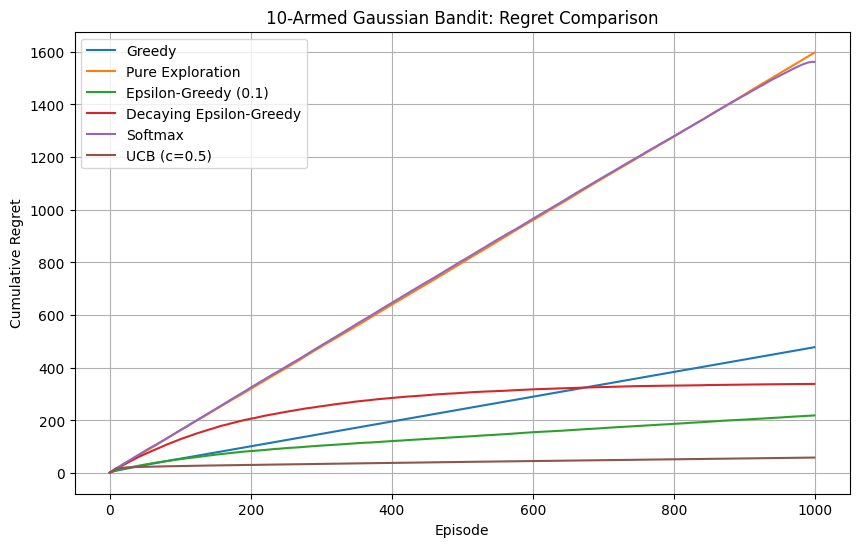

In [ ]:
'''
Use the same setting of 50 environment
instances as in the previous part. What do you observe? How do regrets evolve for different methods?
Describe your observations in details.
'''
agents_to_test = [
    {
        "name": "Greedy",
        "func": pure_exploitation,
        "params": {}
    },
    {
        "name": "Pure Exploration",
        "func": pure_exploration,
        "params": {}
    },
    {
        "name": "Epsilon-Greedy (0.1)",
        "func": epsilon_greedy,
        "params": {"epsilon": 0.1}
    },
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": 1.0, "epsilon_end": 0.01, "decay_type": "exponential"}
    },
    {
        "name": "Softmax",
        "func": softmax,
        "params": {"temp_start": 100.0, "temp_end": 0.01, "decay_type": "linear"}
    },
    {
        "name": "UCB (c=0.5)",
        "func": ucb_strategy,
        "params": {"c": 0.5}
    }
]
regret_results_gaussian = {}
for agent in agents_to_test:
    print(f"Running regret for {agent['name']}...")
    regret_results_gaussian[agent["name"]]=run_regret_experiment_gaussian(
        agent["func"],
        agent["params"],
        num_envs=50,
        steps=1000
    )
plot_regret_comparison(regret_results_gaussian)

**Observations:**
1) Pure exploration and Softmax exhibit nearly linear regret growth, as excessive or unstructured exploration causes frequent selection of suboptimal arms in a high-dimensional, noisy setting.

2) Greedy and ε-greedy reduce regret compared to random strategies but still accumulate substantial regret due to premature convergence (greedy) or persistent exploration (fixed ε).

3) Decaying ε-greedy and UCB achieve the lowest cumulative regret, with UCB performing best overall by explicitly accounting for uncertainty and efficiently balancing exploration and exploitation.

![plot](https://i.postimg.cc/k4NtGvZP/Screenshot-2026-01-18-at-2-55-16-PM.png)

### 8. Reward vs episodes for all agents (20 points)

Plot average rewards vs episodes for each of the 6 agents in the same plot. Basically, for each agent, run 50 instances of 2-armed Bernoulli Bandit environment, run the agent for 1000 episodes; calculate the average reward at each step across all 50 instances and plot the average reward vs episodes. Just to give an example of the plot see the top plot in Figure 2.


In [ ]:
'''
You may have already implemented the required experimental setup in a previous question.
In your observations, explicitly mention: Which previous question this experiment overlaps with if it does.

If you believe this experiment is not identical to what you implemented earlier,
clearly explain why and provide the necessary code. Feel free to add the code cells below.
'''

'\nYou may have already implemented the required experimental setup in a previous question.\nIn your observations, explicitly mention: Which previous question this experiment overlaps with if it does.\n\nIf you believe this experiment is not identical to what you implemented earlier,\nclearly explain why and provide the necessary code. Feel free to add the code cells below.\n'

**Observations:**

1) It overlaps with the question 4.2 armed bernouili bandit testbed experiment where average reward versus time step was plotted for multiple agents so the same experimental setup,averaging procedure,and performance metrics were used so no additional implementation required.

### 9. Optimal Action % vs episode for all agents (20 points)
Plot % Optimal Action vs episodes for each of the 6 agents in the same plot. Basically, for each agent, run 50 instances of 2-armed Bernoulli Bandit environment, run the agent for 1000 episodes; calculate on an average (across 50 instances) for each episode how often (in %) the agent selects the optimal action and plot % Optimal Action vs episodes. Just to give an example of the plot see the bottom plot in Figure 2.



In [ ]:
def run_optimal_action_experiment_bernoulli(agent_func, agent_params,
                                            num_envs=50, steps=1000):
    """
    Runs an agent on multiple 2-armed Bernoulli bandit environments and
    computes the percentage of optimal actions selected per episode.

    Args:
        agent_func: Bandit agent function.
        agent_params: Dictionary of agent hyperparameters.
        num_envs: Number of environments to average over.
        steps: Number of episodes per environment.

    Returns:
        pct_optimal_action: Percentage of optimal action per episode (length = steps).
    """
    optimal_action_counts = np.zeros((num_envs,steps))
    for env_id in range(num_envs):
        alpha=np.random.uniform(0,1)
        beta=np.random.uniform(0,1)
        env=TwoArmedBernoulliBandit(alpha,beta)
        env.reset(seed=env_id)
        optimal_arm=0 if alpha>beta else 1

        actions,_=agent_func(env,steps,**agent_params)
        for t in range(steps):
            if actions[t]==optimal_arm:
                optimal_action_counts[env_id,t]=1
    pct_optimal_action=100*np.mean(optimal_action_counts,axis=0)
    return pct_optimal_action
    pass



In [ ]:
def plot_optimal_action_comparison(results_dict):
    """
    Plots % Optimal Action vs Episodes for multiple agents.

    Args:
        results_dict: Mapping agent name -> % optimal action array.
    """
    plt.figure(figsize=(10,6))
    for agent_name,pct_optimal in results_dict.items():
        plt.plot(pct_optimal,label=agent_name)
    plt.xlabel("Episode")
    plt.ylabel("% Optimal Action")
    plt.title("2-Armed Bernoulli Bandit: % Optimal Action vs Episode")
    plt.legend()
    plt.grid(True)
    plt.show()
    pass

Running Greedy...
Running Pure Exploration...
Running Epsilon-Greedy...
Running Decaying Epsilon-Greedy...
Running Softmax (Decaying)...
Running UCB...


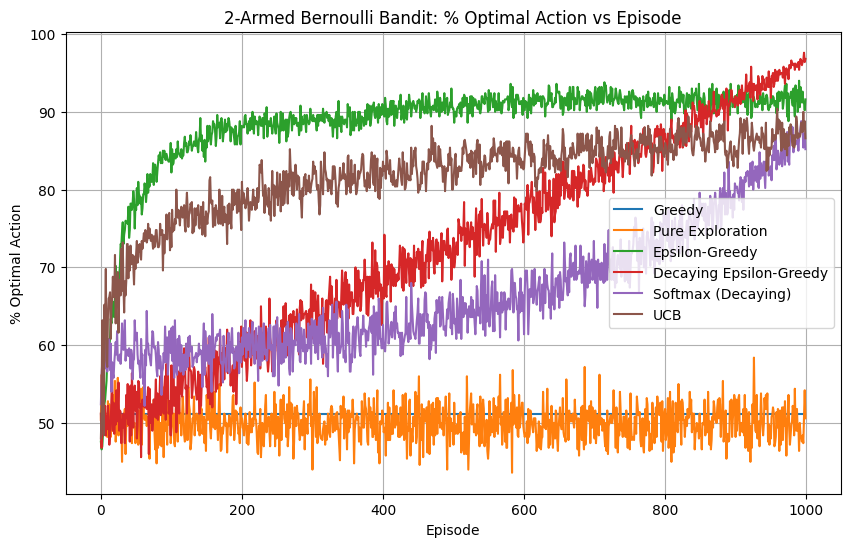

In [ ]:
# TODO: Define the agents and hyperparameters you want to compare
# NOTE: set num_envs=500 to see smoother curve!
'''
agents_to_test = [
    {
        "name": "Greedy",
        "func": pure_exploitation,
        "params": {}
    },
    {
        "name": "Pure Exploration",
        "func": pure_exploration,
        "params": {}
    },
    {
        "name": "Epsilon-Greedy",
        "func": epsilon_greedy,
        "params": {"epsilon": _____}
    },
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": _____, "epsilon_end": _____, "decay_type": _____}
    },
    {
        "name": "Softmax (Decaying)",
        "func": softmax_strategy,
        "params": {"temp_start": _____, "temp_end": _____, "decay_type": _____}
    },
    {
        "name": "UCB",
        "func": ucb_strategy,
        "params": {"c": _____}
    }
]
'''

# TODO: Loop through 'agents_to_test':
#   1. Call run_optimal_action_experiment_bernoulli for each agent.
#   2. Store the resulting curve in a dictionary (e.g., optimal_action_results_bernoulli).

# TODO: Call plot_optimal_action_comparison(optimal_action_results_bernoulli).
agents_to_test = [
    {
        "name": "Greedy",
        "func": pure_exploitation,
        "params": {}
    },
    {
        "name": "Pure Exploration",
        "func": pure_exploration,
        "params": {}
    },
    {
        "name": "Epsilon-Greedy",
        "func": epsilon_greedy,
        "params": {"epsilon": 0.1}
    },
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": 1.0, "epsilon_end": 0.01, "decay_type": "linear"}
    },
    {
        "name": "Softmax (Decaying)",
        "func": softmax,
        "params": {"temp_start": 1.0, "temp_end": 0.1, "decay_type": "linear"}
    },
    {
        "name": "UCB",
        "func": ucb_strategy,
        "params": {"c": 2}
    }
]

optimal_action_results_bernoulli = {}
for agent in agents_to_test:
    print(f"Running {agent['name']}...")
    optimal_action_results_bernoulli[agent["name"]] = (
        run_optimal_action_experiment_bernoulli(
            agent["func"],
            agent["params"],
            num_envs=500,   # use 500 for smoother curves
            steps=1000
        )
    )
plot_optimal_action_comparison(optimal_action_results_bernoulli)

**Observations:**

1) Pure exploration stays near 50% optimal action, while greedy often converges early to suboptimal actions due to lack of exploration.

2) ε-greedy significantly improves optimal action selection (≈90%) by balancing exploration and exploitation.

3) Decaying ε-greedy and UCB achieve the best performance, with fast convergence and the highest long-term optimal action selection, highlighting the benefit of adaptive and uncertainty-aware exploration.

### Plots for 10-armed bandit (20 points)
Repeat the above for 10-armed Gaussian Bandit.
- Average reward vs episodes for all the agents in the 10-armed bandit setting.
- Optimal action % vs episodes for all the agents in the 10-armed bandit setting.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def run_optimal_action_experiment_gaussian(agent_func, agent_params,
                                           num_envs=50, steps=1000):
    """
    Runs an agent on multiple 10-armed Gaussian bandit environments and
    computes the percentage of optimal actions selected per episode.

    Args:
        agent_func: Bandit agent function.
        agent_params: Dictionary of agent hyperparameters.
        num_envs: Number of environments to average over.
        steps: Number of episodes per environment.

    Returns:
        pct_optimal_action: Percentage of optimal action per episode (length = steps).
    """
    optimal_action_counts=np.zeros((num_envs,steps))
    for env_id in range(num_envs):
        env=TenArmedGaussianBandit(num_arms=10,sigma=1.0)
        _,info=env.reset(seed=env_id)
        q_star=info["q_star"]
        optimal_arm=np.argmax(q_star)
        actions,_=agent_func(env,steps,**agent_params)
        for t in range(steps):
            if actions[t]==optimal_arm:
                optimal_action_counts[env_id,t]=1
    pct_optimal_action=100*np.mean(optimal_action_counts,axis=0)
    return pct_optimal_action
    pass


In [ ]:
def plot_optimal_action_comparison(results_dict):
    """
    Plots % Optimal Action vs Episodes for multiple agents.

    Args:
        results_dict: Mapping agent name -> % optimal action array.
    """
    plt.figure(figsize=(10,6))
    for agent_name, pct_optimal in results_dict.items():
        plt.plot(pct_optimal,label=agent_name)
    plt.xlabel("Episode")
    plt.ylabel("% Optimal Action")
    plt.title("10-Armed Gaussian Bandit: % Optimal Action vs Episode")
    plt.legend()
    plt.grid(True)
    plt.show()
    pass

Running Greedy...
Running Pure Exploration...
Running Epsilon-Greedy (0.1)...
Running Decaying Epsilon-Greedy...
Running Softmax...
Running UCB (c=0.5)...


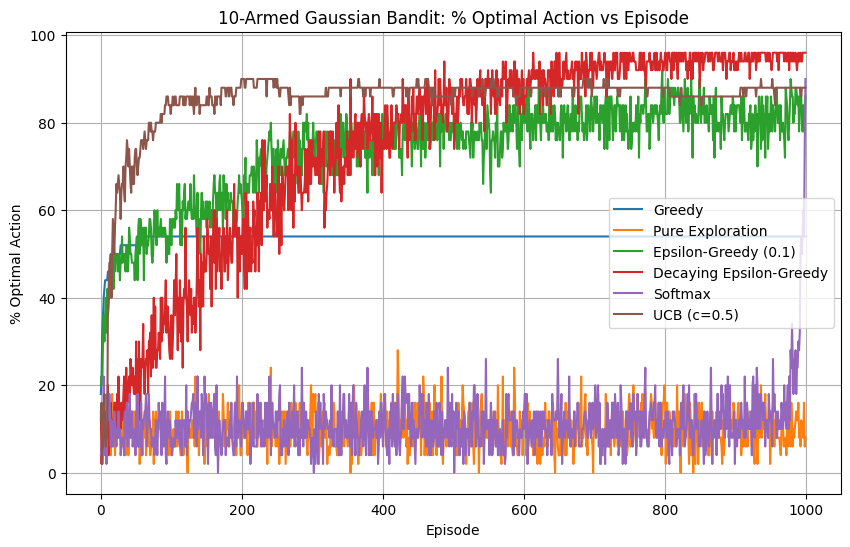

In [ ]:
# TODO: Define the agents and hyperparameters you want to compare
# NOTE: set num_envs=500 to see smoother curve!
'''
agents_to_test = [
    {
        "name": "Greedy",
        "func": pure_exploitation,
        "params": {}
    },
    {
        "name": "Pure Exploration",
        "func": pure_exploration,
        "params": {}
    },
    {
        "name": "Epsilon-Greedy",
        "func": epsilon_greedy,
        "params": {"epsilon": _____}
    },
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": _____, "epsilon_end": _____, "decay_type": _____}
    },
    {
        "name": "Softmax (Decaying)",
        "func": softmax_strategy,
        "params": {"temp_start": _____, "temp_end": _____, "decay_type": _____}
    },
    {
        "name": "UCB",
        "func": ucb_strategy,
        "params": {"c": _____}
    }
]
'''

# TODO: Loop through 'agents_to_test':
#   1. Call run_optimal_action_experiment_gaussian for each agent.
#   2. Store the resulting curve in a dictionary (e.g., optimal_action_results_gaussian).

# TODO: Call plot_optimal_action_comparison(optimal_action_results_gaussian).
agents_to_test = [
    {"name": "Greedy", "func": pure_exploitation, "params": {}},
    {"name": "Pure Exploration", "func": pure_exploration, "params": {}},
    {"name": "Epsilon-Greedy (0.1)", "func": epsilon_greedy, "params": {"epsilon": 0.1}},
    {
        "name": "Decaying Epsilon-Greedy",
        "func": decaying_epsilon_greedy,
        "params": {"epsilon_start": 1.0, "epsilon_end": 0.01, "decay_type": "exponential"}
    },
    {
        "name": "Softmax",
        "func": softmax,
        "params": {"temp_start": 100.0, "temp_end": 0.01, "decay_type": "linear"}
    },
    {"name": "UCB (c=0.5)", "func": ucb_strategy, "params": {"c": 0.5}}
]

optimal_action_results_gaussian = {}
for agent in agents_to_test:
    print(f"Running {agent['name']}...")
    optimal_action_results_gaussian[agent["name"]] = (
        run_optimal_action_experiment_gaussian(
            agent["func"],
            agent["params"],
            num_envs=50,
            steps=1000
        )
    )
plot_optimal_action_comparison(optimal_action_results_gaussian)



**Observations:**

1) Pure exploration selects the optimal arm about 10% of the time, as expected when actions are chosen uniformly at random.

2) The greedy strategy performs poorly due to early commitment to suboptimal arms caused by noisy initial rewards.

3) ε-greedy (ε = 0.1) improves optimal action selection but get constant  due to continued fixed exploration.

4) Decaying ε-greedy steadily increases optimal action selection and reaches high performance by shifting from exploration to exploitation.

5) UCB achieves the highest and fastest convergence to optimal action selection by explicitly accounting for uncertainty.

## Problem 2: Monte Carlo Estimates and TD Learning
($10+10+40+40+20+20+20+20+20+20+10+20+20+20+10=300$ points)

In lecture 7, we saw the **Random Walk Environment (RWE)**. Figure 3 is the RWE for reference, please refer to the lecture for more details. In a nutshell, there are 5 non-terminal states, and two terminal states. An action leading to state 6 gives a reward of +1 and rest all actions give a reward of 0. The environment is purely random, no matter what action you take there is 50% chance that it will be executed as intended and rest 50% times it goes in opposite direction.

![Random Walk Environment](https://i.postimg.cc/brNB9nrP/Whats-App-Image-2026-01-22-at-1-50-50-PM.jpg)


In lecture 7, we learnt about Monte Carlo method and TD learning method for estimating the value of a state:

**Monte Carlo Estimate:**
$$
V_{e+1}(s) = V_{e}(s) + \alpha(e) [G_{e} - V_{e}(s)]
$$

**TD Learning Estimate:**
$$
V_{t+1}(S_{t}) = V_{t}(S_{t}) + \alpha(t) [R_{t+1} + \gamma V_{t}(S_{t+1}) - V_{t}(S_{t})]
$$

In this problem, you are required to calculate Monte Carlo and TD estimates for the RWE. Assume $\gamma=0.99$, policy ($\pi$) is "go left".

### Prerequisites & Environment Setup
First, we define the **Random Walk Environment (RWE)** and the helper function to calculate the **True Values** of the states.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(40)

# --- Random Walk Environment ---
class RandomWalkEnv:
    """
    7-state Random Walk Environment.
    States: 0 (Terminal), 1, 2, 3, 4, 5, 6 (Terminal).
    Start State: 3.
    Actions: 0 (Left), 1 (Right). (Environment ignores action due to 50% randomness)
    Rewards: +1 when transitioning to state 6, 0 otherwise.
    """
    def __init__(self):
        self.observation_space = [0,1, 2, 3, 4, 5, 6 ]
        self.start_state = 3
        self.current_state = self.start_state
        self.end_states = [0, 6]

    def reset(self):
        self.current_state = self.start_state
        return self.current_state

    def step(self, action):
        """
        Executes one time step within the environment.

        Args:
            action (int): The selected action (0 for Left, 1 for Right).
                          Note: The environment is random (50/50), so the specific action is often ignored in logic.

        Returns:
            next_state (int): The state after the transition.
            reward (float): The reward received (1 if reaching state 6, 0 otherwise).
            done (bool): True if the episode has ended (reached state 0 or 6), False otherwise.
            info (dict): Additional information (empty dictionary).
        """
        move=np.random.choice([-1, +1])
        next_state=self.current_state + move
        next_state=max(0, min(6, next_state))
        reward=1.0 if next_state==6 else 0.0
        done=next_state in self.end_states
        self.current_state=next_state
        return next_state,reward,done,{}
        pass

# --- True Value Calculation (Helper) ---
def get_true_values(gamma=0.99):
    """
    Solves the Bellman system of equations for the random walk.
    V(s) = 0.5*[R_left + gamma*V(s-1)] + 0.5*[R_right + gamma*V(s+1)]
    """
    n_states=5
    A=np.zeros((n_states, n_states))
    b=np.zeros(n_states)
    for i in range(n_states):
        A[i, i]=1.0
        if i > 0:
            A[i, i-1] -= 0.5 * gamma
        if i < n_states - 1:
            A[i, i+1] -= 0.5 * gamma
        else:
            b[i] += 0.5 * 1.0
    v = np.linalg.solve(A, b)
    V_full = np.zeros(7)
    V_full[1:6] = v
    return V_full
    pass

TRUE_VALUES = get_true_values()
print("True Values for States 0-6:", np.round(TRUE_VALUES, 3))

True Values for States 0-6: [0.    0.15  0.303 0.462 0.631 0.812 0.   ]


### 1. Generate trajectory (10 points)
Implement a function that would simulate and generate a trajectory for RWE for a given policy $\pi$ and maximum number of steps. The function definition would be like this:

In [ ]:
def generateTrajectory(env, pi, maxSteps):
    """
    Simulates and generates a trajectory for the Random Walk Environment.

    Args:
        env (RandomWalkEnv): The environment instance.
        pi (int): The policy to follow (e.g., 0 for "go left").
        maxSteps (int): Maximum number of steps to run the episode.

    Returns:
        trajectory (list): A list of experience tuples, where each tuple is (state, action, reward, next_state).
                           Returns an empty list if the episode exceeds maxSteps without terminating.
    """
    trajectory=[]
    state=env.reset()
    for _ in range(maxSteps):
        action=pi
        next_state,reward,done,_=env.step(action)
        trajectory.append((state,action,reward,next_state))
        if done:
            return trajectory
        state = next_state
    return []
    pass

# Test Case
env = RandomWalkEnv()
test_traj = generateTrajectory(env, 0, 100)
print(f"Sample Trajectory (Length {len(test_traj)}):", test_traj)

Sample Trajectory (Length 17): [(3, 0, 0.0, np.int64(2)), (np.int64(2), 0, 0.0, np.int64(3)), (np.int64(3), 0, 0.0, np.int64(4)), (np.int64(4), 0, 0.0, np.int64(5)), (np.int64(5), 0, 0.0, np.int64(4)), (np.int64(4), 0, 0.0, np.int64(3)), (np.int64(3), 0, 0.0, np.int64(2)), (np.int64(2), 0, 0.0, np.int64(3)), (np.int64(3), 0, 0.0, np.int64(2)), (np.int64(2), 0, 0.0, np.int64(3)), (np.int64(3), 0, 0.0, np.int64(2)), (np.int64(2), 0, 0.0, np.int64(3)), (np.int64(3), 0, 0.0, np.int64(4)), (np.int64(4), 0, 0.0, np.int64(3)), (np.int64(3), 0, 0.0, np.int64(4)), (np.int64(4), 0, 0.0, np.int64(5)), (np.int64(5), 0, 1.0, 6)]


The function returns a list of experience tuples. Here, `maxSteps` parameter is used to terminate the episode if it exceeds `maxSteps` count. In such a case, the partial trajectory is discarded and an empty list is returned. Test the function using suitable test cases and make sure it is working.

### 2. Step-size decay (10 points)
Implement a function that would decay the step size parameter ($\alpha$). The function definition would be like this:

In [ ]:
def decayAlpha(initialValue, finalValue, maxSteps, decayType):
    """
    Generates a list of alpha values (step sizes) based on the specified decay type.

    Args:
        initialValue (float): The starting value of alpha.
        finalValue (float): The final value of alpha.
        maxSteps (int): The total number of steps/episodes to decay over.
        decayType (str): The type of decay ('linear' or 'exponential').

    Returns:
        alphas (np.ndarray): An array of alpha values for each step.
    """
    if maxSteps <= 1:
        return np.array([finalValue])
    if decayType=="linear":
        alphas=np.linspace(initialValue,finalValue,maxSteps)
    elif decayType=="exponential":
        ratio = (finalValue/initialValue) **(1 /(maxSteps - 1))
        alphas = initialValue * ratio ** np.arange(maxSteps)
    else:
        raise ValueError("decayType must be 'linear' or 'exponential'")
    return alphas
    pass

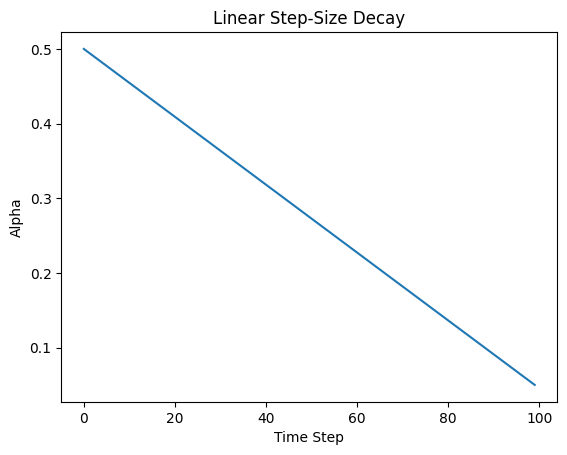

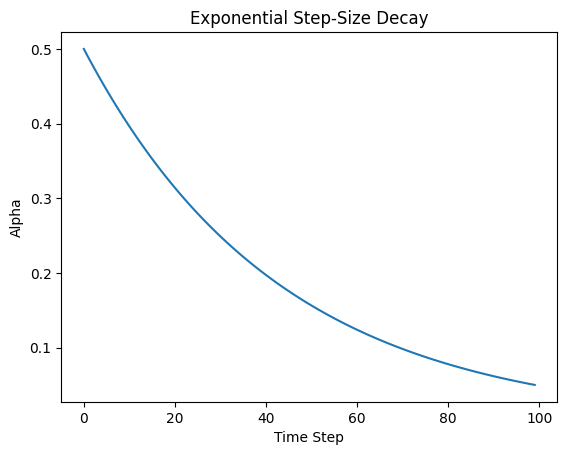

In [ ]:
initial_alpha= 0.5   #for the plot showing the alpha decaying for the both the case of linear and exponential
final_alpha = 0.05
maxSteps = 100

alpha_linear=decayAlpha(initial_alpha,final_alpha,maxSteps, "linear")
alpha_exponential=decayAlpha(initial_alpha,final_alpha,maxSteps,"exponential")
import matplotlib.pyplot as plt

# Linear decay
plt.figure()
plt.plot(alpha_linear)
plt.xlabel("Time Step")
plt.ylabel("Alpha")
plt.title("Linear Step-Size Decay")
plt.show()

#exponential decay
plt.figure()
plt.plot(alpha_exponential)
plt.xlabel("Time Step")
plt.ylabel("Alpha")
plt.title("Exponential Step-Size Decay")
plt.show()


Here `decayType` can be `linear` or `exponential`. `maxSteps` is the maximum number of steps the step parameter should decay for. `initialValue` and `finalValue` are initial and final values of the step size parameter. The function should return a list of step size parameter values. Test the function by trying out different parameter settings. Plot value of $\alpha$ vs time step both for linear and exponential decays.

### 3. Monte Carlo Prediction (40 points)
As explained in the lecture, implement `MonteCarloPrediction` algorithm. Use the same function definition as described in the slides. Make use of the functions implemented in above two parts. Note `MonteCarloPrediction` should work for both **FVMC** (First Visit MC) and **EVMC** (Every Visit MC) settings. Test the algorithm for RWE using some pre-defined test cases and see the algorithm produces the desired results. Report your test cases and observations.

In [ ]:
def monte_carlo_prediction(env, num_episodes, alpha_start=0.5, alpha_end=0.01,
                           decay_period=250, mc_type='FVMC', gamma=0.99):
    """
    Implements the Monte Carlo Prediction algorithm (works for both FVMC and EVMC).

    Args:
        env (RandomWalkEnv): The environment instance.
        num_episodes (int): Total number of episodes to simulate.
        alpha_start (float): Initial step size (learning rate).
        alpha_end (float): Final step size.
        decay_period (int): Number of episodes over which alpha decays.
        mc_type (str): Type of MC update - 'FVMC' (First Visit) or 'EVMC' (Every Visit).
        gamma (float): Discount factor.

    Returns:
        V_history (np.ndarray): History of value estimates for each state over all episodes.
                                Shape: [num_episodes, n_states]
    """
    n_states=len(env.observation_space)
    v=np.zeros(n_states)
    v_r=np.zeros((num_episodes,n_states))
    alphas=decayAlpha(alpha_start,alpha_end,decay_period,"linear")
    firstVisit=(mc_type=="FVMC")
    for e in range(num_episodes):
        alpha=alphas[min(e,decay_period-1)]
        t=generateTrajectory(env,pi=0,maxSteps=1000)
        if len(t)==0:
            v_r[e]=v
            continue
        visited=np.zeros(n_states,dtype=bool)
        for i,(s,a,r,s_next) in enumerate(t):
            if visited[s] and firstVisit:
                continue
            visited[s]=True
            G=0.0
            power=0
            for j in range(i,len(t)):
                G+=(gamma**power)*t[j][2]
                power+=1
            v[s]=v[s]+alpha*(G-v[s])
        v_r[e]=v.copy()
    return v_r
    pass

In [ ]:

print("True Values:", np.round(TRUE_VALUES, 3))
#test case for first visit monte carlo
V_fvmc=monte_carlo_prediction(env, 1000, mc_type='FVMC')
print("Final FVMC values:", np.round(V_fvmc[-1], 3))

#test case for everyvisit monte carlo
V_evmc = monte_carlo_prediction(env, 1000, mc_type='EVMC')
print("Final EVMC values:", np.round(V_evmc[-1], 3))


True Values: [0.    0.15  0.303 0.462 0.631 0.812 0.   ]
Final FVMC values: [0.    0.185 0.322 0.476 0.615 0.788 0.   ]
Final EVMC values: [0.    0.101 0.201 0.381 0.606 0.831 0.   ]


**OBSERVATION**
Both the FVMC and EVMC successfully learn value functions that approximate the true values and EVMC converges faster for states closer to the reward (especially state5) due to more frequent updates within an episode,while FVMC shows more conservative updates and slightly slower convergence.

### 4. Temporal Difference Prediction (40 points)

As explained in the lecture, implement `TemporalDifferencePrediction` algorithm. Use the same function definition as described in the slides. Test the algorithm for RWE using some pre-defined test cases and see the algorithm produces the desired results. Report your test cases and observations.

In [ ]:
def temporal_difference_prediction(env, num_episodes, alpha_start=0.5, alpha_end=0.01,
                                   decay_period=250, gamma=0.99):
    """
    Implements the Temporal Difference TD(0) Prediction algorithm.

    Args:
        env (RandomWalkEnv): The environment instance.
        num_episodes (int): Total number of episodes to simulate.
        alpha_start (float): Initial step size.
        alpha_end (float): Final step size.
        decay_period (int): Number of episodes over which alpha decays.
        gamma (float): Discount factor.

    Returns:
        V_history (np.ndarray): History of value estimates for each state over all episodes.
                                Shape: [num_episodes, n_states]
    """
    n_states=len(env.observation_space)
    v=np.zeros(n_states)
    v_r=np.zeros((num_episodes,n_states))
    alphas=decayAlpha(alpha_start,alpha_end,decay_period,"linear")
    for e in range(num_episodes):
        alpha=alphas[min(e,decay_period-1)]
        s=env.reset()
        done=False
        while not done:
            a=0
            s_next,r,done,_=env.step(a)
            td_target=r
            if not done:
                td_target+=gamma*v[s_next]
            td_error=td_target-v[s]
            v[s]=v[s]+alpha*td_error
            s=s_next
        v_r[e]=v.copy()
    return v_r
    pass

In [ ]:
print("True Values:", np.round(TRUE_VALUES, 3))
env = RandomWalkEnv()
V_td = temporal_difference_prediction(
    env,
    num_episodes=1000,
    alpha_start=0.5,
    alpha_end=0.01,
    decay_period=250,
    gamma=0.99)
print("Final TD values:",np.round(V_td[-1],3))

True Values: [0.    0.15  0.303 0.462 0.631 0.812 0.   ]
Final TD values: [0.    0.139 0.287 0.489 0.652 0.828 0.   ]


**OBSERVATION**
here the observation is that compared to Monte Carlo methods,TD(0) exhibits lower variance and faster convergence and minor deviations from the true values are due to stochastic transitions, finite sampling and the use of a decaying learning rate.

### 5. First-Visit Monte Carlo estimate (20 points)
Plot the **MC-FVMC** estimate of each non-terminal state of RWE as it progress through different episodes. In the same plot also plot the true estimate. Take maximum of 500 episodes. You can play with different settings of $\alpha$, for example, the step size parameter ($\alpha$) starts from 0.5 and decreases exponentially to 0.01 till 250 episodes and after that it is constant. Or else you can also try with small $(<1)$ value of constant $\alpha$. Analyze the plots for each state and report your observations, findings and possible reasons for the observed behavior.

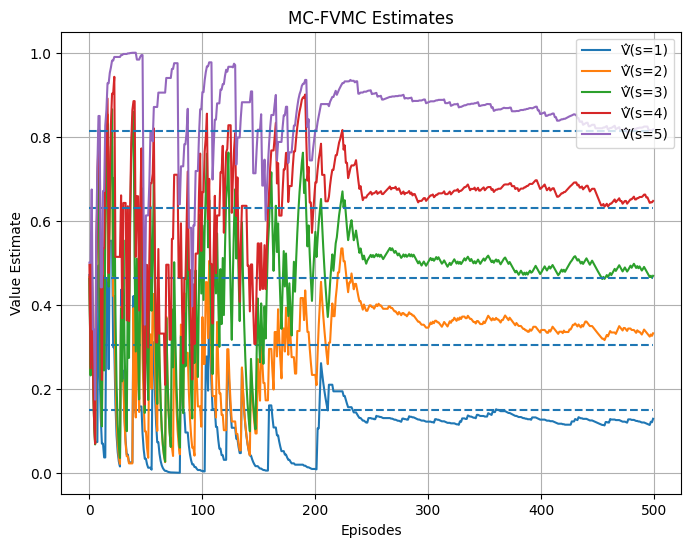

In [ ]:
def plot_value_estimates(V_history, true_values, title, log_scale=False):
    """
    Plots the estimated value of non-terminal states (1-5) over episodes against the true values.

    Args:
        V_history (np.ndarray): The history of value estimates. Shape: [num_episodes, n_states].
        true_values (np.ndarray): The ground truth values for the states.
        title (str): Title for the plot.
        log_scale (boolean): If True, use a logarithmic scale for the y-axis.

    Returns:
        None (Displays the plot).
    """
    num_episodes=V_history.shape[0]
    episodes=np.arange(num_episodes)
    plt.figure(figsize=(8,6))

    # Plot estimated values for non-terminal states
    for s in range(1, 6):
        plt.plot(episodes,V_history[:, s],label=f"V̂(s={s})")
        plt.hlines(true_values[s],0,num_episodes-1,
                   linestyles="dashed")
    plt.xlabel("Episodes")
    plt.ylabel("Value Estimate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    if log_scale:
        plt.yscale("log")
    plt.show()
    pass

# Example Usage for Q5 (MC-FVMC)
history_fvmc = monte_carlo_prediction(env, 500, mc_type='FVMC')
plot_value_estimates(history_fvmc, TRUE_VALUES, "MC-FVMC Estimates")

**Observations (MC-FVMC):**

i) here we are getting the high variance in early episodes as the MC_FVMC estimates show significant fluctuations in intitial episodes because updates are based on complete episode return.with few samples the variance will be high.

ii) Gradual convergence toward the true vales

iii) faster convergence for states closer to reward.

### 6. Every Visit Monte Carlo estimate (20 points)
Plot the **MC-EVMC** estimate of each non-terminal state of RWE as it progress through different episodes. In the same plot also plot the true estimate. Take maximum of 500 episodes. You can play with different settings of $\alpha$, for example, the step size parameter ($\alpha$) starts from 0.5 and decreases exponentially to 0.01 till 250 episodes and after that it is constant. Or else you can also try with small $(<1)$ value of constant $\alpha$. Analyze the plots for each state and report your observations, findings and possible reasons for the observed behavior. How does EVMC fair against FVMC?

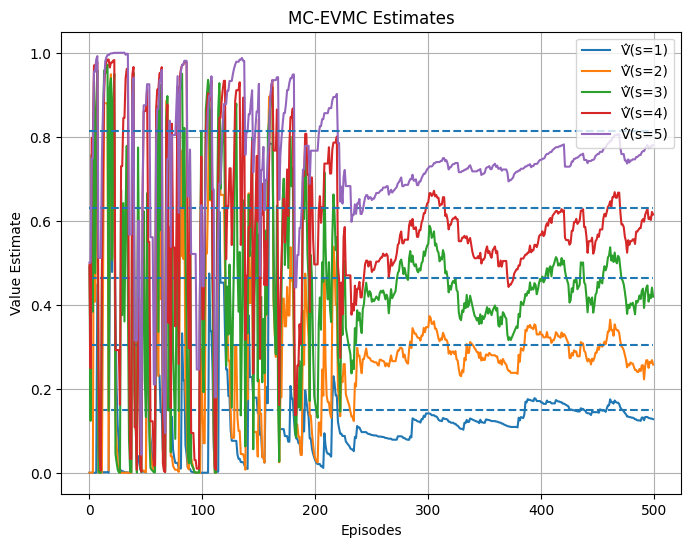

In [ ]:
# TODO: Implement Every-Visit Monte Carlo prediction
# Hint: Use mc_type = 'EVMC'

num_episodes = 500

# Example Usage for Q6 (MC-EVMC)
# TODO: Call Monte Carlo prediction function
# Store value estimates across episodes
history_evmc = monte_carlo_prediction(env, 500, mc_type='EVMC')

# TODO: Plot the values
plot_value_estimates(history_evmc, TRUE_VALUES, "MC-EVMC Estimates")



**Observations (MC-EVMC):**

i) Faster convergence than FMVC:The MC_EVMC estimates converge more quickly toward true values compared to MC-FVMC especially for states closer to the rewarding terminal state,as EVMC updates state value at every visit within an episode

ii) Reduced variance and smoother estimates

iii) consistent state-dependent behaviour

### 7. TD esitmate (20 points)
Plot the **TD** estimate of each non-terminal state of RWE as it progress through different episodes. In the same plot also plot the true estimate. Take maximum of 500 episodes. You can play with different settings of $\alpha$, for example, the step size parameter ($\alpha$) starts from 0.5 and decreases exponentially to 0.01 till 250 episodes and after that it is constant. Or else you can also try with small $(<1)$ value of constant $\alpha$. Analyze the plots for each state and report your observations, findings and possible reasons for the observed behavior.

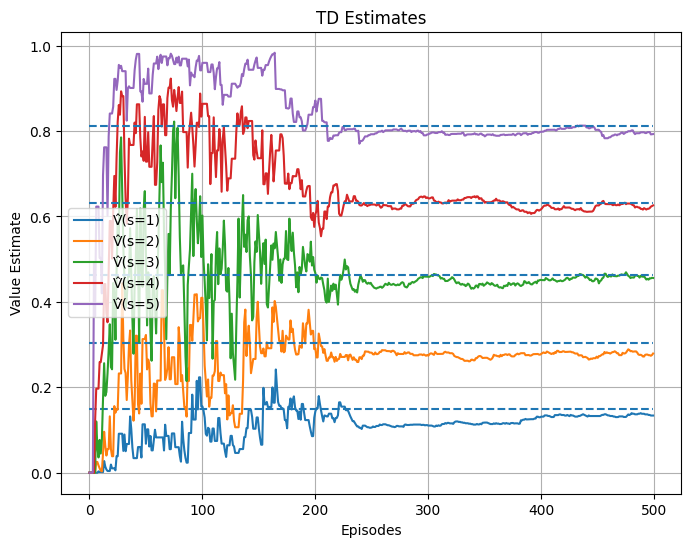

In [ ]:
# TODO: Implement Temporal Difference (TD(0)) prediction

num_episodes = 500

# Example Usage for Q7 (TD)
# TODO: Call TD prediction function
# Store value estimates across episodes
history_td = temporal_difference_prediction(env, 500)

# TODO: Plot the values
plot_value_estimates(history_td, TRUE_VALUES, "TD Estimates")


**Observations (TD):**

i) Faster and smoother convergence: The TD estimates converge faster and exhibit slower variance compared to Monte carlo because TD updates the value functino at every time step using bootstrapped estimates rather than waiting for complete episodes

ii) Stable learning through bootstrapping:After initial fluctuations , The TD estimates stabilize near the true values

iii) state closer to rewarding terminal state converge faster, while state farther away converge more slowly.

### 8. Smoothing variation (20 points)
As you might notice, the above plots may have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these (this is similar to the Bandit setting). Plot MC-FVMC, MC-EVMC and TD with this averaged out version. This will give you smoother plots. The plot will be similar to shown in lecture 7. Record your seeds and report these along with the plots.

Averaging complete over 50 runs.
Sample Seeds (TD): [100, 101, 102, 103, 104]


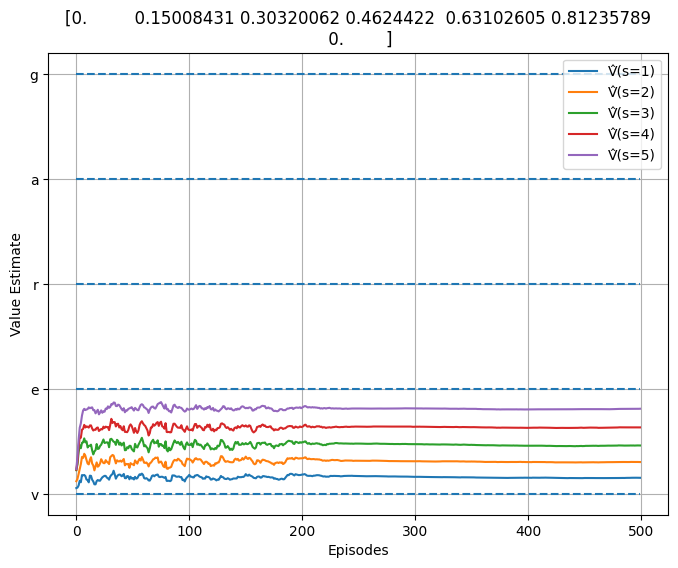

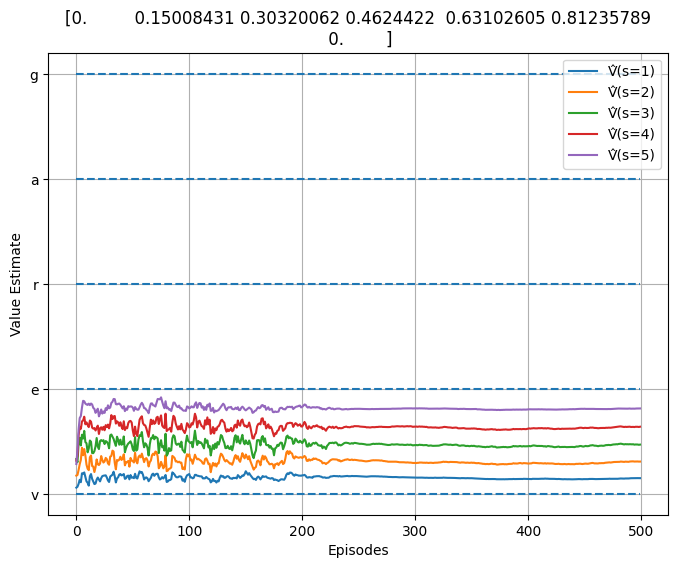

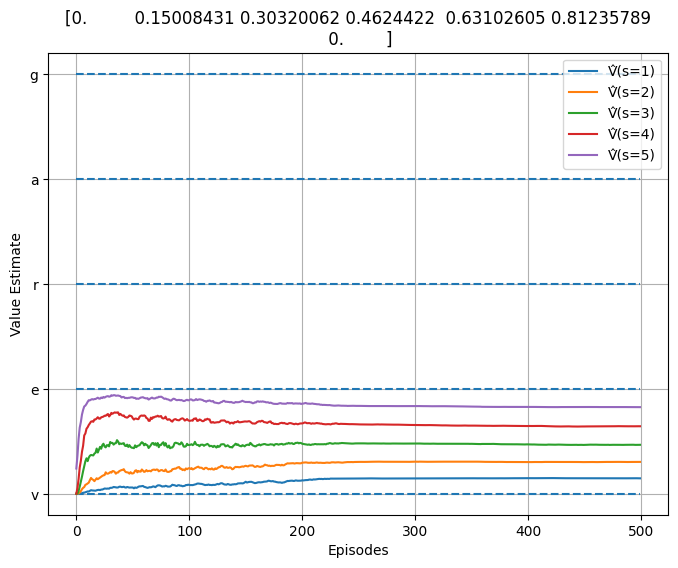

In [ ]:
# TODO: Average value estimates over multiple runs
# Methods: MC-FVMC, MC-EVMC, TD

num_runs = 50
num_episodes = 500


def run_averaged_experiment(agent_func, env, num_runs=50, num_episodes=500, **kwargs):
    """
    Runs an RL agent/algorithm multiple times on a given environment to compute
    averaged value estimates. Each run uses a different random seed for reproducibility.

    Args:
        agent_func (callable): The agent function to execute (e.g., monte_carlo_prediction,
                               temporal_difference_prediction).
                               Expected signature: func(env, num_episodes, **kwargs) -> V
        env (gym.Env): The environment instance to run the experiment on.
        num_runs (int, optional): Number of independent runs to perform. Defaults to 50.
        num_episodes (int, optional): Number of episodes per run. Defaults to 500.
        **kwargs: Arbitrary keyword arguments passed directly to the agent_func
                  (e.g., mc_type='FVMC', alpha=0.1, gamma=0.99).

    Returns:
        avg_estimates (np.ndarray): The estimated value function averaged over `num_runs`.
                                    Shape should correspond to the number of non-terminal states.
        seeds (list of int): A list of the random seeds used for each run.
    """
    n_states=len(env.observation_space)
    all_runs=np.zeros((num_runs,num_episodes,n_states))
    seeds=[]
    for run in range(num_runs):
        seed=100 + run
        seeds.append(seed)
        np.random.seed(seed)
        env_run=RandomWalkEnv()
        V_history=agent_func(env_run,num_episodes,**kwargs)
        all_runs[run]=V_history
    avg_estimates=np.mean(all_runs,axis=0)
    return avg_estimates,seeds
    pass

# Run Averaged Experiments
avg_fvmc, seeds_fvmc = run_averaged_experiment(monte_carlo_prediction, env, mc_type='FVMC')
avg_evmc, seeds_evmc = run_averaged_experiment(monte_carlo_prediction, env, mc_type='EVMC')
avg_td, seeds_td = run_averaged_experiment(temporal_difference_prediction, env)

print("Averaging complete over 50 runs.")
print("Sample Seeds (TD):", seeds_td[:5])

# Plot all three averaged
plot_value_estimates(avg_fvmc, 'Average MC-FVMC (50 Runs)', TRUE_VALUES)
plot_value_estimates(avg_evmc, 'Average MC-EVMC (50 Runs)', TRUE_VALUES)
plot_value_estimates(avg_td, 'Average TD (50 Runs)', TRUE_VALUES)

# TODO: Compute averaged estimates for all methods


**Observations:**

i) Averaging resuces the variance significantly meaning averaging value estimates over multiple independent run produces much smoother learning curves compared to single-run plots

ii) clear comparison of learning behaviour meaning after smoothing convergence behaviour of different methods becomes clear.Td converges teh fast and most smoothly followe by EVMC and then FVMC

iii) consistent convergence to the true values.

### 9. FVMC estimate in log-scale (20 points)
Plot the **MC-FVMC** estimate of each non-terminal state of RWE as it progress through different episodes. But this time, the **x-axis (episodes) should be log-scale**. In the same plot also plot the true estimate. The plot will be similar to shown in lecture 7. Take maximum of 500 episodes. You can play with different settings of $\alpha$, for example, the step size parameter ($\alpha$) starts from 0.5 and decreases exponentially to 0.01 till 250 episodes and after that it is constant. Or else you can also try with small $(<1)$ value of constant $\alpha$. This plot will help to zoom in and observe the behavior of the estimates in the initial stages. Analyze the plots for each state and report your observations, findings and possible reasons for the observed behavior.

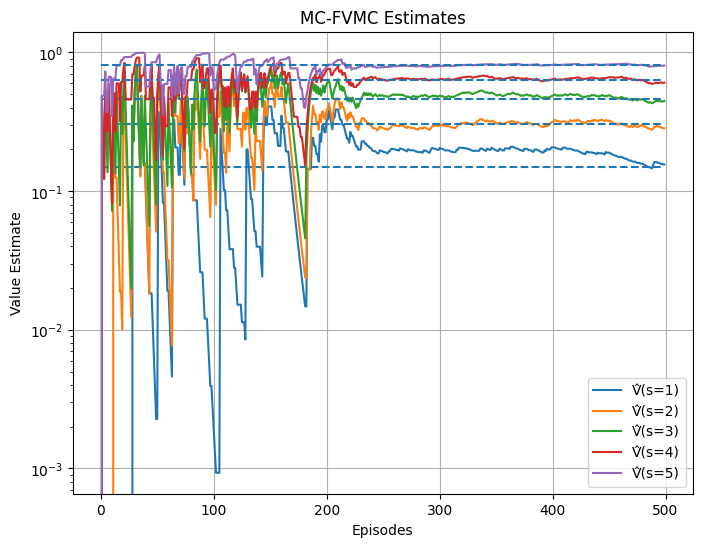

In [ ]:
# TODO: Plot averaged MC-FVMC estimates using log scale
# Example Usage for Q5 (MC-FVMC)
history_fvmc = monte_carlo_prediction(env, 500, mc_type='FVMC')
plot_value_estimates(history_fvmc, TRUE_VALUES, "MC-FVMC Estimates", log_scale=True)

**Observations:**

i) log scale clearly shows the early state instability meaning log scale plot magnifies the large fluctuations in FVMC estimates during the initial episodes,highlighting the high variance caused by limited samples.

ii) High varance due to First -Visit MOnte carlo updates since FVMC updates each state only once per episode and waites until episode termination

iii) Gradual stabilization and convergence.

### 10. EVMC estimate in log-scale (20 points)

Plot the **MC-EVMC** estimate of each non-terminal state of RWE as it progress through different episodes. But this time, the **x-axis (episodes) should be log-scale**. In the same plot also plot the true estimate. Take maximum of 500 episodes. You can play with different settings of $\alpha$. This plot will help to zoom in and observe the behavior of the estimates in the initial stages. Analyze the plots for each state and report your observations, findings and possible reasons for the observed behavior. How does EVMC fair against FVMC?

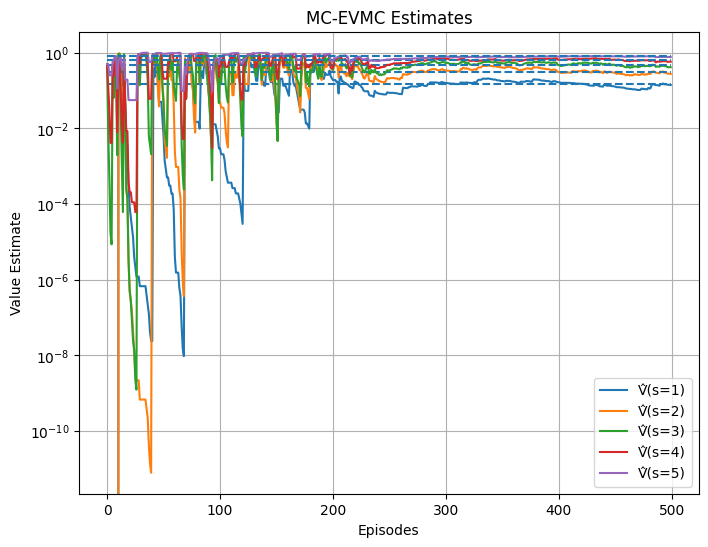

In [ ]:
# TODO: Plot averaged MC-EVMC estimates using log scale
# TODO: Call Monte Carlo prediction function
# Store value estimates across episodes
history_evmc = monte_carlo_prediction(env, 500, mc_type='EVMC')

# TODO: Plot the values
plot_value_estimates(history_evmc, TRUE_VALUES, "MC-EVMC Estimates", log_scale=True)

**Observations:**

i) Early stage behaviour is clearly visible on log scale and high variance in early episodes arises due to stochastic transitions and limited samples which gets amplified by log representation

ii) EVMC reduces variance faster than FVMC by averaging multiple visits within the same episode, leading to smoother convergence in later episodes.

iii) compared to FMVC EVMC converges faster and exhibits lower variance due to more frequent updates per episode.While both mehods are unbiased and converge asymptotically to the true value function, EVMC is more sample efficient and stabilizes earlier

### 11. TD estimate of non-terminal states (10 points)

Plot the **TD** estimate of each non-terminal state of RWE as it progress through different episodes. But this time, the **x-axis (episodes) should be log-scale**. In the same plot also plot the true estimate. The plot will be similar to shown in lecture 7. Take maximum of 500 episodes. You can play with different settings of $\alpha$. This plot will help to zoom in and observe the behavior of the estimates in the initial stages. Analyze the plots for each state and report your observations, findings and possible reasons for the observed behavior.

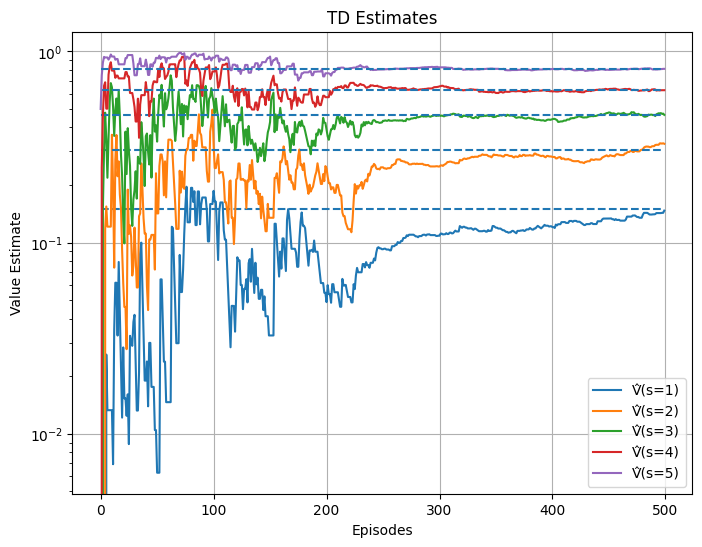

In [ ]:
# TODO: Plot averaged TD estimates for non-terminal states using log scale
# TODO: Call TD prediction function
# Store value estimates across episodes
history_td = temporal_difference_prediction(env, 500)

# TODO: Plot the values
plot_value_estimates(history_td, TRUE_VALUES, "TD Estimates", log_scale=True)

**Observations (Log Scale):**

i) Early learning behaviour is clearly visible as log scale plot highlights the rapid inital updates of TD

ii) Lower variance compared to Monte carlo:TD exhibits less fluctuations in the initial stages compared to MC-FMVC and MC-EVMC due to bootstrapping and incremental updates

iii) Fast and Stable convergence.

### 12. Comparitive analysis (20 points)

Based on the plots, compare MC-FVMC, MC-EVMC and TD approaches and report your observations.

i) CONVERGENCE SPEED: TD learning converges the fastest among the three followed by MC-EVMC and then MC-FVMC. TD updates the value function at every step using the bootsrapping, allowing value information to propagagte quickly across states. EVMC converges faster than EVMC because it updates state values at every visit within an episode.

ii) vaiance and stability:MC-FVMC exhibits the highest variance, especially in early episodes, as updates are based on complete episode returns and occur only once per state per episode. MC-EVMC reduces this variance by averaging over multiple visits within an episode. TD shows the lowest variance and smoothest learning curves due to incremental updates and bootstrapping.

iii)Sample efficeny and bias-variance tradeoff:Both MC-FVMC and MC-EVMC are unbiased estimators and converges to the true value function but require more episodes to stabilize.TD is more sample efficient and converges faster though it introduces a small bias due to bootstrapping.

### 13. FVMC Return for non-terminal state (20 points)
Plot the **MC-FVMC Target value ($G_{t}$)** for any one non-terminal state of RWE as it progress through different episodes. Use the same setting as above. In the same plot also include the optimal value of the state. The plot will be similar to discussed in lecture 7. What do you observe and what are the reasons for what you observe? Explain and Report.

In [ ]:
def collect_mc_targets(env, num_episodes, state_to_track=3, mc_type='FVMC', gamma=0.99):
    """
    Runs episodes and collects the Monte Carlo target values (Returns G_t)
    for a specific state whenever it is visited.

    Args:
        env (RandomWalkEnv): The environment instance.
        num_episodes (int): Total number of episodes to run.
        state_to_track (int): The specific non-terminal state to track (e.g., 3).
        mc_type (str): 'FVMC' (First-Visit) or 'EVMC' (Every-Visit).
                       - FVMC: Collect target only for the first occurrence in an episode.
                       - EVMC: Collect target for every occurrence in an episode.
        gamma (float): Discount factor for calculating returns.

    Returns:
        targets (list of float): A list containing all the collected target values (G_t)
                                 for the tracked state across all episodes.
    """
    # TODO: Initialize an empty list 'targets' to store the G_t values.

    # TODO: Loop over 'num_episodes':
    #     1. Generate a trajectory using your generateTrajectory() function.
    #     2. Initialize G = 0.
    #     3. Loop backwards through the trajectory (from T-1 to 0):
    #         a. Update G: G = reward + gamma * G
    #         b. Get the state at the current step.
    #         c. Check if this state == state_to_track.
    #            - If True:
    #                 - If mc_type == 'EVMC':
    #                     Append G to 'targets'.
    #                 - If mc_type == 'FVMC':
    #                     Store G temporarily (or check if this is the first visit index).
    #                     (Hint: For FVMC, you might want to find the *first* index of the state
    #                      in the trajectory forward-pass or just overwrite the G value
    #                      as you go backwards so you end up with the return for the first visit).
    #
    #     4. (For FVMC specific logic): If using the overwrite method, append the final stored G
    #        for the first visit to 'targets'.

    # TODO: Return the list of targets.
    targets = []
    for _ in range(num_episodes):
        trajectory=generateTrajectory(env,pi=0,maxSteps=1000)
        if len(trajectory)==0:
            continue
        G=0.0
        first_visit_G=None
        for (s,a,r,s_next) in reversed(trajectory):
            G=r+gamma* G
            if s==state_to_track:
                if mc_type=='EVMC':
                    targets.append(G)
                elif mc_type=='FVMC':
                    first_visit_G=G
        if mc_type=='FVMC' and first_visit_G is not None:
            targets.append(first_visit_G)
    return targets
    pass

def plot_target_distribution(targets, true_value, title):
    """
    Plots the target values (G_t) across episodes/occurrences.

    Args:
        targets (list): List of collected target values.
        true_value (float): The optimal/true value of the state (for reference line).
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(targets, '.', alpha=0.6, label='MC Targets $G_t$')
    plt.axhline(true_value, color='red', linestyle='--', label='True Value')
    plt.xlabel("Occurrences / Episodes")
    plt.ylabel("Return $G_t$")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    pass

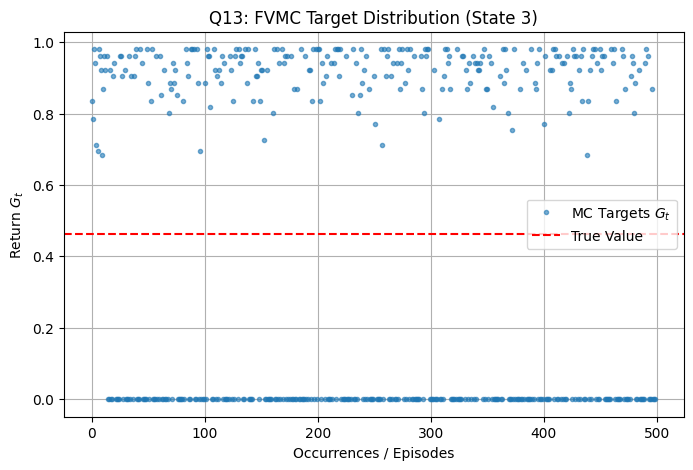

In [ ]:
# TODO: Call the collection function for First-Visit MC
# We use 'FVMC' so we only store the return for the *first* time state 3 is visited per episode.
targets_fvmc = collect_mc_targets(env, num_episodes=500, state_to_track=3, mc_type='FVMC')

# TODO: Plot the values with the True Value line for comparison
# The plot allows us to see the "noise" in the returns.
plot_target_distribution(targets_fvmc, TRUE_VALUES[3], "Q13: FVMC Target Distribution (State 3)")

Monte Carlo target values Gt for state 3 exhibits high variance and remain noisy across episodes this occurs beacause each target corresponds to the return from a complete episode which depends on stochastic tansition and varying episode length.Although individual target do not converge average converge to true value of a state.

### 14. EVMC Return for non-terminal state (20 points)

Plot the **MC-EVMC Target value ($G_{t}$)** for any one non-terminal state of RWE (use the same state as above) as it progress through different episodes. Use the same setting as above. In the same plot also include the optimal value of the state. What do you observe and what are the reasons for what you observe? Explain and Report.

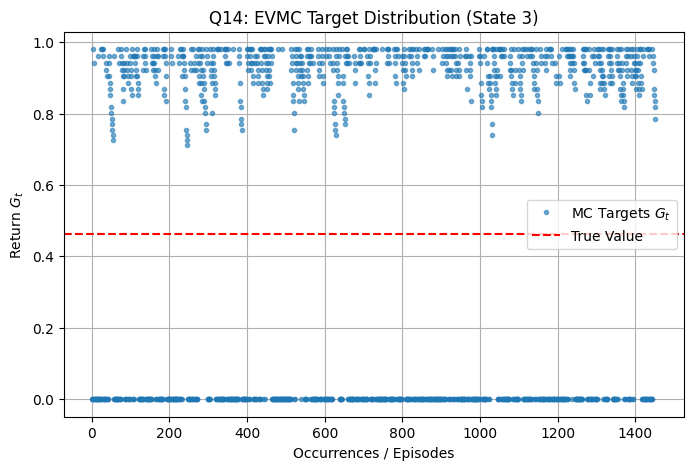

In [ ]:
# TODO: Call the collection function for Every-Visit MC
# We use 'EVMC' to store returns for *every* occurrence of state 3.
targets_evmc = collect_mc_targets(env, num_episodes=500, state_to_track=3, mc_type='EVMC')

# TODO: Plot the values to compare against FVMC and True Value
plot_target_distribution(targets_evmc, TRUE_VALUES[3], "Q14: EVMC Target Distribution (State 3)")

**Observations:**
i) In EVMC, the target Gt is collected every time the state is visited, so a single episode may contribute multiple target values.

ii) EVMC collects more samples than FVMC, but these samples are still noisy; averaging is what leads to convergence, not individual targets.

iii) compareed to FVMC, EVMC produces more target samples resulting in denser distribution of points. However individual EVMC targets remain noisy just like FVMC.

### 15. TD Return for non-terminal state (10 points)

Plot the **TD Target value ($G_{t}$ estimate)** for any one non-terminal state of RWE (use the same state as above) as it progress through different episodes. Use the same setting as above. In the same plot also include the optimal value of the state. The plot will be similar to discussed in lecture 7. What do you observe and what are the reasons for what you observe? Explain and Report.

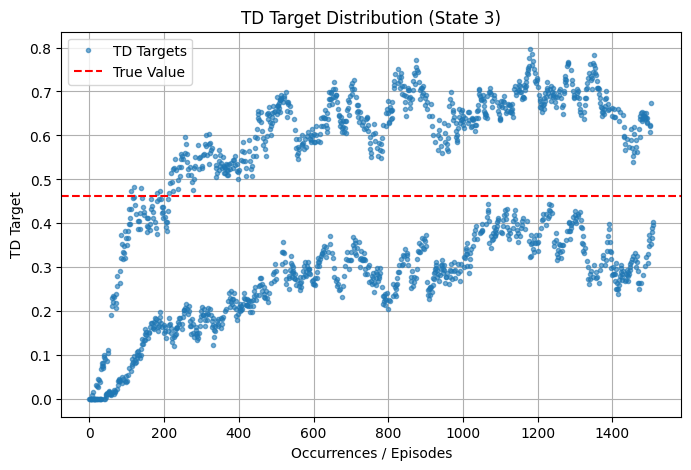

In [ ]:
def collect_td_targets(env, num_episodes, state_to_track=3, alpha=0.1, gamma=0.99):
    """
    Runs episodes and collects the TD Target values (R + gamma * V(s'))
    for a specific state to observe how they vary and evolve.

    Args:
        env (RandomWalkEnv): The environment instance.
        num_episodes (int): Total number of episodes to run.
        state_to_track (int): The specific non-terminal state to track (e.g., 3).
        alpha (float): Step size for updating V (needed so the value estimate evolves).
        gamma (float): Discount factor.

    Returns:
        targets (list of float): A list containing all the collected TD target values
                                 for the tracked state across all episodes.
    """
    targets=[]
    n_states=len(env.observation_space)
    V = np.zeros(n_states)
    for _ in range(num_episodes):
        s=env.reset()
        done=False
        while not done:
            a=0
            s_next,r,done,_=env.step(a)
            td_target=r
            if not done:
                td_target+=gamma*V[s_next]
            if s==state_to_track:
                targets.append(td_target)
            V[s]=V[s]+alpha*(td_target-V[s])
            s=s_next
    return targets
    pass

def plot_target_distribution(targets, true_value, title):
    """
    Plots the specific target values across occurrences to visualize variance.

    Args:
        targets (list): List of target values collected.
        true_value (float): The optimal value for the tracked state.
        title (str): Plot title.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(targets, '.', alpha=0.6, label='TD Targets')
    plt.axhline(true_value, color='red', linestyle='--', label='True Value')
    plt.xlabel("Occurrences / Episodes")
    plt.ylabel("TD Target")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    pass

# Example Usage

targets_td = collect_td_targets(env, num_episodes=500, state_to_track=3, alpha=0.1)
plot_target_distribution(targets_td, TRUE_VALUES[3], "TD Target Distribution (State 3)")

**Observations:**
i) The TD target values are much less noisy compared to Monte Carlo targets and remain within a relatively narrow band.

ii) The targets cluster around the true value of the state rather than spreading between extreme values.

iii) As learning progresses, the TD targets become more stable, showing only small fluctuations.

### 16. Target Comparison

Compare First-View, Every-View Monte Carlo and Temporal difference prediction algorithms on their target return values.


i) Variance of Target Returns: first visit and every visit monte carlo targets exhibits high variance because their target returns is computed using the complete episode return which depends on stochastic transition and varying episode length. In contrast TD targets have lower variance

ii) EFFECT OF VISIT FREQUENCY: EVMC collects targets reurn every time a state is visited resulting in more target samples compared to FVMC which collects only one target per episode.

iii) BIAS VARIANCE TRADEOFF : Monte carlo methods produces unbiased target returns as they use actual return from the environment but suffer high variance whereas TD targets introduce a small bias due to bootstrapping yet achieve much lower variance enabling faster and more stable learinng.